# GUESS MY WEIGHT 

### Welcome to Guess My Weight!
This is a fun, interactive

### Instructions for Google Colab
 

![guess_your_weight.gif](images/guess_your_weight.gif)

## Table of Contents TOC
[Overview](#overview)<br />
[Data Understanding](#data-understanding)<br />
[Data Preparation](#data-preparation)<br />
[Modeling](#modeling)<br />
[Evaluation](#evaluation)<br />
[Github Repository and Resources](#github-repository-and-resources)<br />


## Overview
Health and Wellness is a big business. Specifically, weight loss. We’re all trying because it’s very, very hard. I recently went on my own weight loss journey, losing about 50 lbs in roughly 18 months. Weighing myself every morning, I agonized over every tenth of a lb, recording it in an app on my phone. I realized that losing big chunks of weights starts with small, incremental progress on the scale. But I didn’t stop there. As a data nerd I thought, “let’s record every meal.” So I did that too. I wondered… given all this data I have, could I predict my weight? My watch and phone captures my exercise, sleep, eating, and so much more. There must be trends here. At a minimum, I should be able to predict whether my weight will go up or down from the previous day. So let’s do it.<br />
[return to TOC](#table-of-contents-TOC)

## Data Understanding
I have much (and probably too much) of this data in my iphone and Apple Watch. It contains the weight information, workouts, heart rate, meals - broken down into subcategories (proteins, fats, etc). Most importantly is the weight. That will be the feature that I primarily use for classification.  

Because it’s my data, there’s more clarity about data entry methods. This is more subjective, than a controlled experiment with many participants. I know what data I was diligent about collecting so I should be able to scrub it appropriately. For instance, I didn’t record my fluids consistently - water, tea, coffee. Water consumption is a big part of this so I’ll have to be clear about the gaps in the data.<br />
[return to TOC](#table-of-contents-TOC)


## Data Preparation
The data is stored on a csv file in a kaggle repository.

in an xml file on my phone. After downloading it into python notebook and digging a little, there are roughly 180 rows of weight entries (approximately 6 months) but it’s not clear how many gaps there are. All of the data is stored as an entry, with time stamps and usually some numeric form. Whether it’s heart rate, weight, caloric info, it’s one numeric entry with an associated units. We’re primarily dealing with ints and floats, all numeric, and we’ll be using daily totals/averages. Because we only have one weigh-in per day, we’re only going to use daily values of other data. So… we know we have approximately 100-180 rows. I can’t say at the moment how many columns, because this will be based on what happens in pre-processing. Which brings me to../.

There are two major challenges with the pre-processing. The first deals with the privacy of my personal health data. How do I balance reproducibility requirements with privacy concerns? I need to make the dataset publicly available, including all of my pre-processing steps, but I also want to make sure no one can link it back to me, Andrew Q. Bennett (my real middle name doesn’t start with Q… gotcha!!!!). And the initial dataset is large, maybe 40 MB. The approach we’ll use is to perform some pre-processing locally, and then upload to the kaggle site when it’s ready for public consumption. In my jupyter notebook, I will comment out some of this code so that we can see the work, but it won’t affect the code when we press “run”.

The second is dealing with correlation efforts. For instance, we know that all data related to working out is going to be correlated with eachother. The steps, average heart rate, workout calories, etc will all be correlated to whether I went for a jog that day. Making decisions about which data to use will be a challenge, even with some baseline domain knowledge. There is a treasure trove that may have nothing (or very little) to do with weight loss, like Vitamin A intake. PCA Analysis will be critical without losing some data. I know about health…but I’m no expert. Maybe Vitamin A intake can help/hurt weight loss.

The many visualization efforts will come from making sure the weight data is presented cleanly. A nice, regression line showing weight trends over different periods will be very helpful.<br />
[return to TOC](#table-of-contents-TOC)

### Instructions for Google Colab
Do not run the code snippet below. This is merely a reference if you'd like to download the dataset from Kaggle. Uncomment the below code snippet for downloading datasets from kaggle in Google Colab, the very first time.  

In [202]:
! pip install opendatasets
! pip install kaggle

In [203]:
import opendatasets as od
import pandas
 
od.download(
    "https://www.kaggle.com/datasets/andrewmbennett/guess-my-weight-4-25")

Skipping, found downloaded files in ".\guess-my-weight-4-25" (use force=True to force download)


In [204]:
import pandas as pd
import datetime as dt
import numpy as np
from statsmodels.tsa.stattools import adfuller
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns

### Importing csv file

In [205]:
df = pd.read_csv('content/guess-my-weight-4-25/merge_health_4_25.csv')

In [206]:
df

,date,BodyMass_lb,StepCount_count,DistanceWalkingRunning_mi,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,FlightsClimbed_count,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,...,DietaryZinc_mg,DietarySelenium_mcg,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs
0,2023-08-24,196.9,8895.0,4.163569,2055.322,564.7780,24.0,159.7455,11.8,9.5,...,0.5,9.0,0.3,1.1,1572.0,12.0,0.783333,5.558333,1.766667,0.266667
1,2023-08-25,195.1,9276.0,4.512434,2174.950,793.3800,7.0,62.9275,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,36.0,1.008333,3.700000,1.500000,0.133333
2,2023-08-26,195.1,10883.0,4.948209,2074.476,395.3870,9.0,118.3000,8.3,15.0,...,1.4,13.0,0.5,0.8,1943.0,8.0,1.400000,3.916667,1.558333,0.050000
3,2023-08-27,192.9,19174.0,9.909258,2187.383,895.4360,14.0,79.9300,3.1,2.9,...,1.5,18.0,0.3,0.5,1986.0,45.0,0.891667,5.566667,2.591667,0.066667
4,2023-08-28,192.9,13636.0,6.833914,2186.244,901.5490,21.0,70.8500,4.6,7.1,...,1.3,17.0,0.3,0.9,455.0,43.0,0.641667,5.275000,2.008333,0.158333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024-03-04,175.7,8191.0,4.051709,1983.933,499.0720,4.0,87.7000,7.9,9.9,...,2.8,58.0,0.3,2.8,1023.0,76.0,0.000000,0.000000,0.000000,0.000000
194,2024-03-05,174.2,8882.0,4.448750,2009.083,566.5723,9.0,88.6000,4.8,6.3,...,1.9,123.0,0.1,0.8,2387.0,135.0,0.816667,4.775000,1.858333,2.683333
195,2024-03-06,173.3,2610.0,1.272886,759.761,127.8580,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
196,2023-08-23,NaN,7325.0,3.399540,2057.531,476.7400,17.0,80.7000,1.8,0.9,...,0.5,2.0,0.2,0.5,422.0,10.0,0.983333,3.400000,1.091667,0.241667


One of the first things will do is make the date the index and convert date to

### Date Column Feature and Formatting

In [207]:
#convert the date
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [208]:
# Make Date the index 
df.set_index('date', inplace=True)

In [209]:
# delete the last row 
df.drop(['2023-08-22', '2023-08-23'], axis=0,inplace=True)

In [210]:
df

,BodyMass_lb,StepCount_count,DistanceWalkingRunning_mi,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,FlightsClimbed_count,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,DietaryFatSaturated_g,...,DietaryZinc_mg,DietarySelenium_mcg,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs
date,,,,,,,,,,,,,,,,,,,,,
2023-08-24,196.9,8895.0,4.163569,2055.322,564.7780,24.0,159.7455,11.8,9.5,36.2203,...,0.5,9.0,0.3,1.1,1572.0,12.0,0.783333,5.558333,1.766667,0.266667
2023-08-25,195.1,9276.0,4.512434,2174.950,793.3800,7.0,62.9275,0.0,0.0,10.8165,...,0.0,0.0,0.0,0.0,0.0,36.0,1.008333,3.700000,1.500000,0.133333
2023-08-26,195.1,10883.0,4.948209,2074.476,395.3870,9.0,118.3000,8.3,15.0,39.5000,...,1.4,13.0,0.5,0.8,1943.0,8.0,1.400000,3.916667,1.558333,0.050000
2023-08-27,192.9,19174.0,9.909258,2187.383,895.4360,14.0,79.9300,3.1,2.9,27.9600,...,1.5,18.0,0.3,0.5,1986.0,45.0,0.891667,5.566667,2.591667,0.066667
2023-08-28,192.9,13636.0,6.833914,2186.244,901.5490,21.0,70.8500,4.6,7.1,16.3000,...,1.3,17.0,0.3,0.9,455.0,43.0,0.641667,5.275000,2.008333,0.158333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-02,174.6,13416.0,6.533640,2048.925,1651.9890,16.0,76.2000,2.4,3.0,25.0000,...,1.1,24.0,0.3,1.4,1996.0,148.0,0.000000,0.000000,0.000000,0.000000
2024-03-03,175.0,15876.0,7.722016,2048.189,1443.2150,22.0,59.9000,1.3,0.6,9.7000,...,3.2,51.0,0.4,3.2,1987.0,173.0,1.108333,3.925000,1.966667,0.300000
2024-03-04,175.7,8191.0,4.051709,1983.933,499.0720,4.0,87.7000,7.9,9.9,25.9000,...,2.8,58.0,0.3,2.8,1023.0,76.0,0.000000,0.000000,0.000000,0.000000


### BodyMass Inspection

In [211]:
df['BodyMass_lb'].describe()

count    196.000000
mean     127.684184
std       88.425096
min        0.000000
25%        0.000000
50%      181.100000
75%      188.300000
max      388.500000
Name: BodyMass_lb, dtype: float64

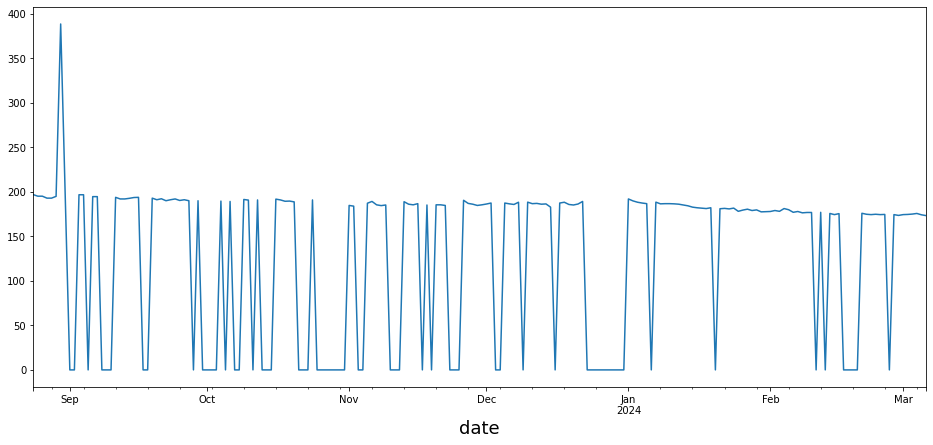

In [212]:
import matplotlib.pyplot as plt
%matplotlib inline

df['BodyMass_lb'].plot(figsize = (16,7));
plt.show()

In [213]:
null_weights = len(df[df['BodyMass_lb'] < 100])
total = len(df['BodyMass_lb'])
null_weights/total

0.3163265306122449

We have a few issues to resolve. The biggest issue is the number of zero entries. Based on our knowledge of human weight fluctation, we know it's impossible to weight 0 pounds. More than likely, these are the dates when a wiegh-in was never performed. We should convert these values to NaN to make our graph appear better.

In [214]:
df.loc[df['BodyMass_lb'] == 0.0,'BodyMass_lb'] = np.nan

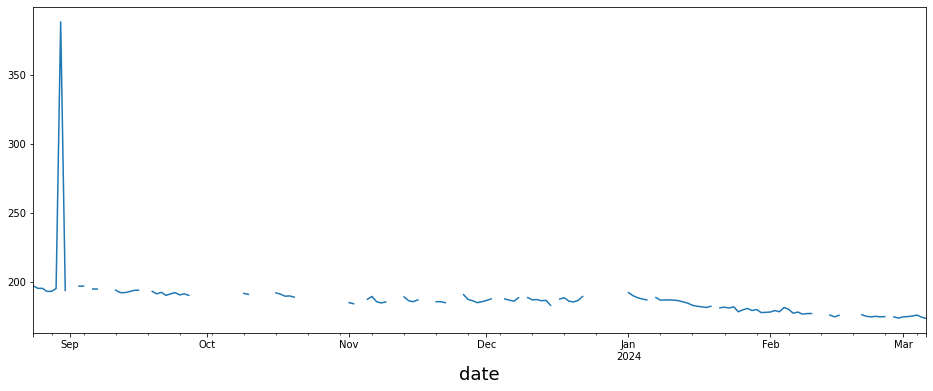

In [215]:
df['BodyMass_lb'].plot(figsize = (16,6));
plt.show()

Our weights appear better, except for one errant reading. We know that 388.5 is not possible. So we'll go ahead and make that null as well.

In [216]:
df.loc[df['BodyMass_lb'] == 388.5,'BodyMass_lb'] = np.nan

Now, let's plot the graph

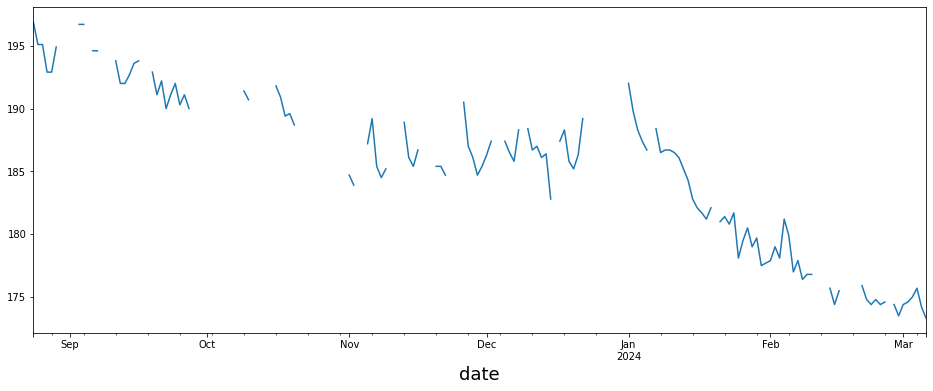

In [217]:
df['BodyMass_lb'].plot(figsize = (16,6));
plt.show()

Okay, now we have some consistent data, with only Nans where it's missing. Let's move on to our other columns.

### Important Column inspection - Sleep

In [218]:
col_sleep = ['SleepAnalysis_AsleepDeep_hrs', 'SleepAnalysis_AsleepCore_hrs', 'SleepAnalysis_AsleepREM_hrs', 'SleepAnalysis_Awake_hrs', 'AppleExerciseTime_min']

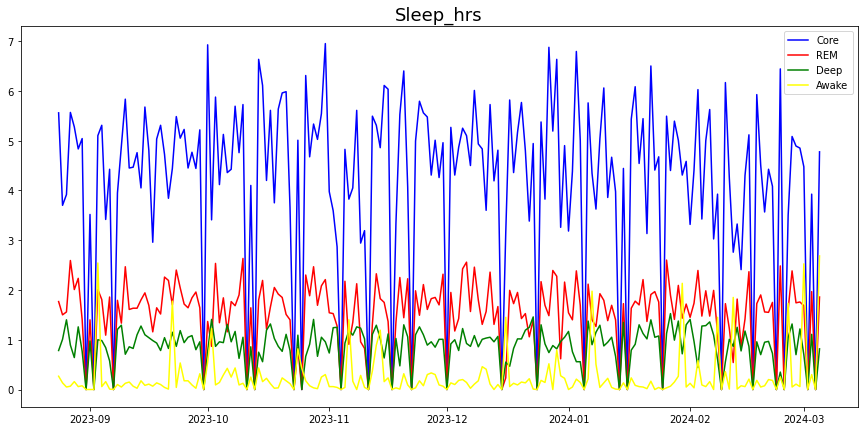

In [219]:
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['SleepAnalysis_AsleepCore_hrs'], color='blue', label = 'Core')
plt.plot(df['SleepAnalysis_AsleepREM_hrs'], color='red', label = 'REM')
plt.plot(df['SleepAnalysis_AsleepDeep_hrs'], color='green', label = 'Deep')
plt.plot(df['SleepAnalysis_Awake_hrs'], color='yellow', label = 'Awake')
 
plt.title('Sleep_hrs')
plt.legend()
plt.show()

In [220]:
df['SleepAnalysis_AsleepDeep_hrs'].replace(to_replace=0,value = df['SleepAnalysis_AsleepDeep_hrs'].mean(), inplace = True)
df['SleepAnalysis_AsleepCore_hrs'].replace(to_replace=0,value = df['SleepAnalysis_AsleepCore_hrs'].mean(), inplace = True)
df['SleepAnalysis_AsleepREM_hrs'].replace(to_replace=0,value = df['SleepAnalysis_AsleepREM_hrs'].mean(), inplace = True)
df['SleepAnalysis_Awake_hrs'].replace(to_replace=0,value = df['SleepAnalysis_Awake_hrs'].mean(), inplace = True)

In [221]:
df

,BodyMass_lb,StepCount_count,DistanceWalkingRunning_mi,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,FlightsClimbed_count,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,DietaryFatSaturated_g,...,DietaryZinc_mg,DietarySelenium_mcg,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs
date,,,,,,,,,,,,,,,,,,,,,
2023-08-24,196.9,8895.0,4.163569,2055.322,564.7780,24.0,159.7455,11.8,9.5,36.2203,...,0.5,9.0,0.3,1.1,1572.0,12.0,0.783333,5.558333,1.766667,0.266667
2023-08-25,195.1,9276.0,4.512434,2174.950,793.3800,7.0,62.9275,0.0,0.0,10.8165,...,0.0,0.0,0.0,0.0,0.0,36.0,1.008333,3.700000,1.500000,0.133333
2023-08-26,195.1,10883.0,4.948209,2074.476,395.3870,9.0,118.3000,8.3,15.0,39.5000,...,1.4,13.0,0.5,0.8,1943.0,8.0,1.400000,3.916667,1.558333,0.050000
2023-08-27,192.9,19174.0,9.909258,2187.383,895.4360,14.0,79.9300,3.1,2.9,27.9600,...,1.5,18.0,0.3,0.5,1986.0,45.0,0.891667,5.566667,2.591667,0.066667
2023-08-28,192.9,13636.0,6.833914,2186.244,901.5490,21.0,70.8500,4.6,7.1,16.3000,...,1.3,17.0,0.3,0.9,455.0,43.0,0.641667,5.275000,2.008333,0.158333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-02,174.6,13416.0,6.533640,2048.925,1651.9890,16.0,76.2000,2.4,3.0,25.0000,...,1.1,24.0,0.3,1.4,1996.0,148.0,0.863462,4.172222,1.510000,0.252308
2024-03-03,175.0,15876.0,7.722016,2048.189,1443.2150,22.0,59.9000,1.3,0.6,9.7000,...,3.2,51.0,0.4,3.2,1987.0,173.0,1.108333,3.925000,1.966667,0.300000
2024-03-04,175.7,8191.0,4.051709,1983.933,499.0720,4.0,87.7000,7.9,9.9,25.9000,...,2.8,58.0,0.3,2.8,1023.0,76.0,0.863462,4.172222,1.510000,0.252308


In [222]:
df[col_sleep] = df[col_sleep].fillna(df[col_sleep].mean())

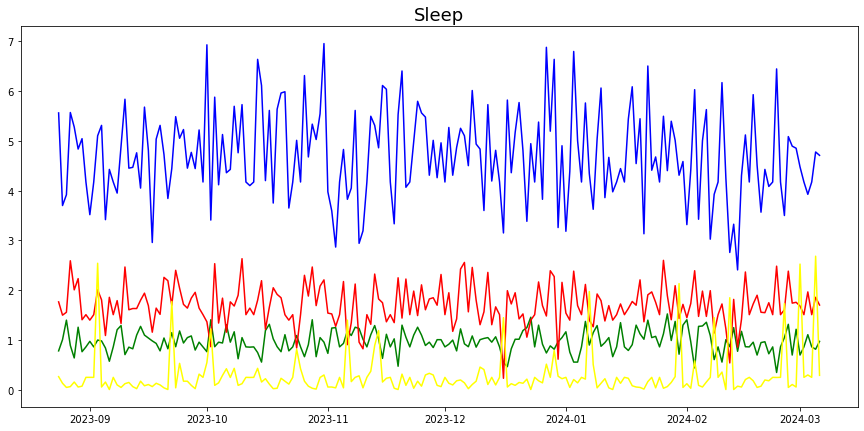

In [223]:
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['SleepAnalysis_AsleepDeep_hrs'], color='green')
plt.plot(df['SleepAnalysis_AsleepCore_hrs'], color='blue')
plt.plot(df['SleepAnalysis_AsleepREM_hrs'], color='red')
plt.plot(df['SleepAnalysis_Awake_hrs'], color='yellow')
 
plt.title('Sleep')
plt.show()

### Important Column inspection - Exercise

In [224]:
col_exercise = ['StepCount_count', 'DistanceWalkingRunning_mi', 'BasalEnergyBurned_Cal', 'ActiveEnergyBurned_Cal', 'FlightsClimbed_count']

In [225]:
#df.drop(['StepCount_count', 'DistanceWalkingRunning_mi', 'FlightsClimbed_count'], axis = 1, inplace = True)

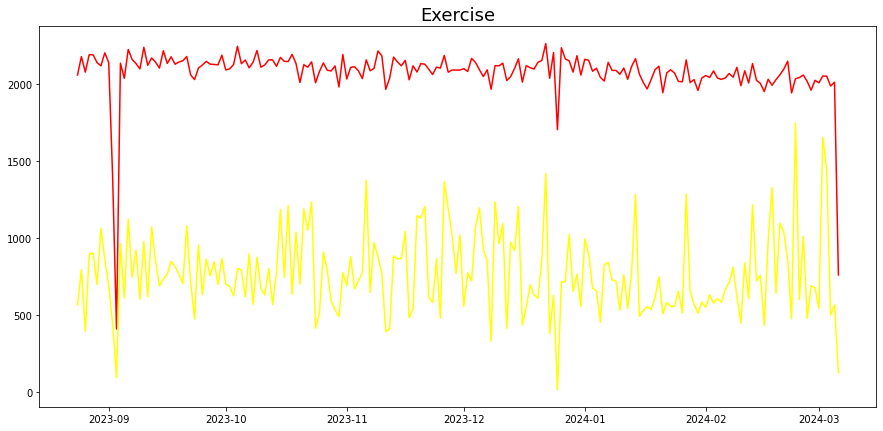

In [226]:
plt.rcParams['figure.figsize']=(15,7)

#plt.plot(df['StepCount_count'], color='green')
#plt.plot(df['DistanceWalkingRunning_mi'], color='blue')
plt.plot(df['BasalEnergyBurned_Cal'], color='red')
plt.plot(df['ActiveEnergyBurned_Cal'], color='yellow')
#plt.plot(df['FlightsClimbed_count'], color='yellow')
 
plt.title('Exercise')
plt.show()

In [227]:
df.loc[df['ActiveEnergyBurned_Cal'] < 250, 'ActiveEnergyBurned_Cal'] = df['ActiveEnergyBurned_Cal'].mean()
df.loc[df['BasalEnergyBurned_Cal'] < 1750, 'BasalEnergyBurned_Cal'] = df['BasalEnergyBurned_Cal'].mean()

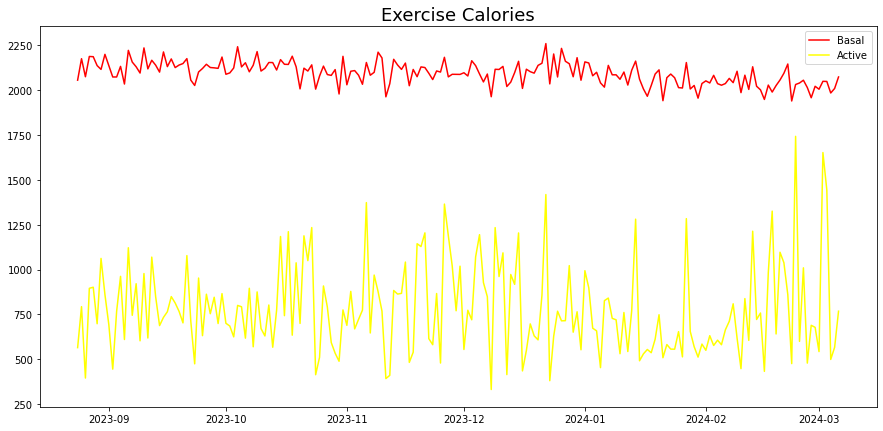

In [228]:
plt.rcParams['figure.figsize']=(15,7)

#plt.plot(df['StepCount_count'], color='green')
#plt.plot(df['DistanceWalkingRunning_mi'], color='blue')
plt.plot(df['BasalEnergyBurned_Cal'], color='red', label = 'Basal')
plt.plot(df['ActiveEnergyBurned_Cal'], color='yellow', label = 'Active')
#plt.plot(df['FlightsClimbed_count'], color='yellow')
 
plt.title('Exercise Calories')
plt.legend()
plt.show()

### Important Column inspection - Dietary

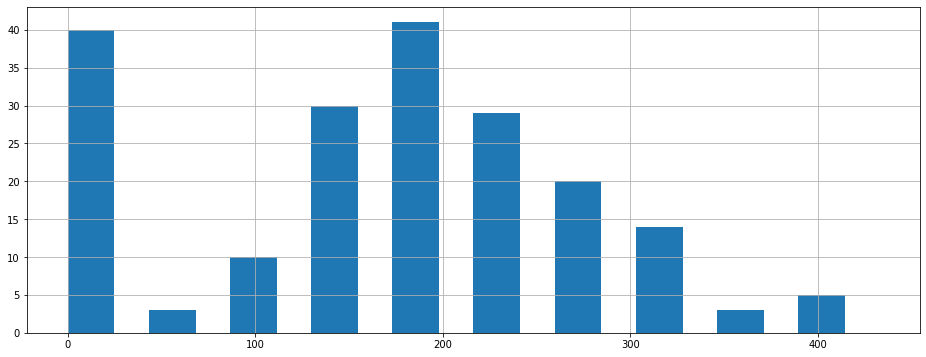

In [229]:
df['DietaryCarbohydrates_g'].hist(figsize = (16,6), width = 25);
plt.show()

In [230]:
null_carbs = len(df[df['DietaryCarbohydrates_g'] == 0])
null_carbs/total

0.18877551020408162

So roughly 18% of have considerable 0 values here. 

Missing at Random (MAR): Data points are missing depending on observed values in other variables, but not on the missing values themselves. This is a more complex scenario, but imputation using observed data can still be effective.

After doing some previewing, I'm determining that those 3 data points, whose carbs are under 75g, are also incomplete. So this isn't just the carbohydrate data, but all of the dietary information. So, we'll set all of the dietary information to Nan where the daily carbohydrates are less than 75g.


In [231]:
#we'll go ahead and limit the 
Nan_cond = df['DietaryCarbohydrates_g'] < 75.0

col_dietary = [col for col in df.columns if "Dietary" in col]
df.loc[df['DietaryCarbohydrates_g'] < 75.0, col_dietary] = np.nan

In [232]:
df.loc['2023-08-29':'2023-09-04','DietaryFatTotal_g':'DietaryProtein_g']

,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,DietaryFatSaturated_g,DietaryCholesterol_mg,DietarySodium_mg,DietaryCarbohydrates_g,DietaryFiber_g,DietarySugar_g,DietaryEnergyConsumed_Cal,DietaryProtein_g
date,,,,,,,,,,,
2023-08-29,144.7,7.2,9.5,31.79,1020.0,5397.5,252.36,23.63,57.04,3275.0,320.99
2023-08-30,109.6,19.8,24.2,27.10,323.0,2111.0,153.80,14.80,58.50,1983.0,99.50
2023-08-31,53.5,4.8,7.4,16.70,317.0,3635.0,129.60,14.70,32.90,1635.0,87.90
2023-09-01,150.7,11.7,36.7,54.40,748.0,4619.0,424.20,28.00,116.20,3767.0,98.70
2023-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-04,102.3,4.7,21.4,29.80,62.0,2549.0,260.20,21.50,41.60,2627.0,45.90


Let's figure out which columns we want to keep.

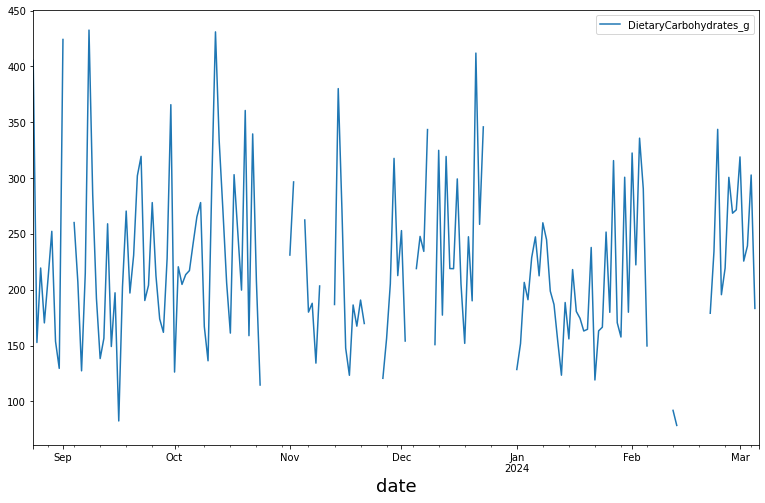

In [233]:
#let's plot our carbohydrates
df['DietaryCarbohydrates_g'].plot(figsize = (13,8), subplots=False, legend=True);
plt.show()

okay, so we have some gaps to fill, let's start with filling in some 

Let's look at our null data

In [234]:
nul_carbs = pd.isnull(df['DietaryCarbohydrates_g'])
df[nul_carbs]['DietaryCarbohydrates_g']

date
2023-09-02   NaN
2023-09-03   NaN
2023-10-25   NaN
2023-10-26   NaN
2023-10-27   NaN
2023-10-28   NaN
2023-10-29   NaN
2023-10-31   NaN
2023-11-03   NaN
2023-11-04   NaN
2023-11-10   NaN
2023-11-11   NaN
2023-11-12   NaN
2023-11-22   NaN
2023-11-23   NaN
2023-11-25   NaN
2023-12-03   NaN
2023-12-04   NaN
2023-12-09   NaN
2023-12-24   NaN
2023-12-25   NaN
2023-12-26   NaN
2023-12-27   NaN
2023-12-28   NaN
2023-12-29   NaN
2023-12-30   NaN
2023-12-31   NaN
2024-02-06   NaN
2024-02-07   NaN
2024-02-08   NaN
2024-02-09   NaN
2024-02-10   NaN
2024-02-11   NaN
2024-02-14   NaN
2024-02-15   NaN
2024-02-16   NaN
2024-02-17   NaN
2024-02-18   NaN
2024-02-19   NaN
2024-02-20   NaN
2024-02-21   NaN
2024-03-06   NaN
Name: DietaryCarbohydrates_g, dtype: float64

A quick scan here shows that we have chunks of time series data missing. The best way to handle this, in my opion, is to divide into two subsets, to disregard those stretches of missing data.

These chunks will be (8-23: 10-24), (10-31: 12-23), (1-01: 02-05), (02-22: 03-05). These were chunks of data were determined by finding "chunks" of both null and valid data. Chunks of valid data were determined to have no more than 3 consecutive days of null data. To fill these in, let's start create the chunks

In [235]:
SepOct = df['2023-08-23':'2023-10-24']
NovDec = df['2023-10-31':'2023-12-23']
Jan = df['2024-01-01':'2024-02-05']
FebMar = df['2024-02-24':'2024-03-05']

okay, now let's fill in the null values with the mean for all of the dietary nulls here.

In [236]:
df[col_dietary] = df[col_dietary].fillna(df[col_dietary].mean())

Let's plot the macros data now and see how it looks filled in

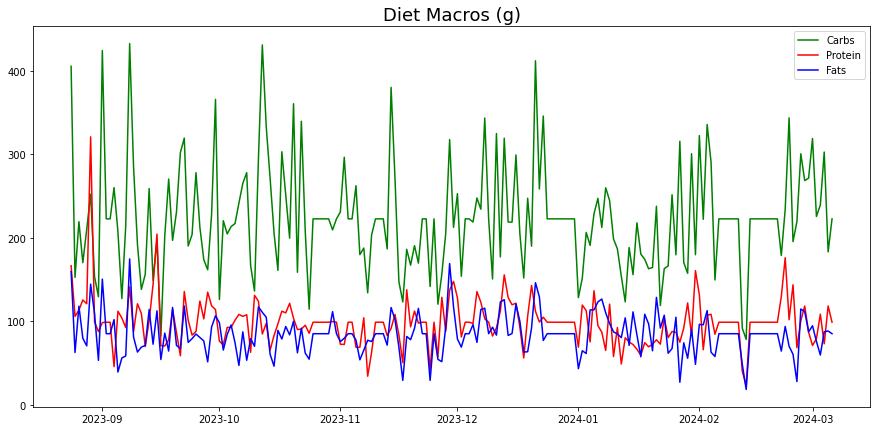

In [237]:
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['DietaryCarbohydrates_g'], color='green', label = 'Carbs')
plt.plot(df['DietaryProtein_g'], color='red', label = 'Protein')
plt.plot(df['DietaryFatTotal_g'], color='blue', label = 'Fats')
 
plt.title('Diet Macros (g)')
plt.legend()
plt.show()

### Focusing on Weight
What we really care about is weight, and the difference of weight.

#### Test for Stationality
First, let's use a Dickey-Fuller Test on our data to see if we have Stationality. We're going to use the Dickey-Fuller test in the stats model. This function does not permit null values. And, we have some null values, so we'll have to fill in missing data. To do this, we'll need to utilize a certain level of synthetic data. For starters, let's just first look at our data. 

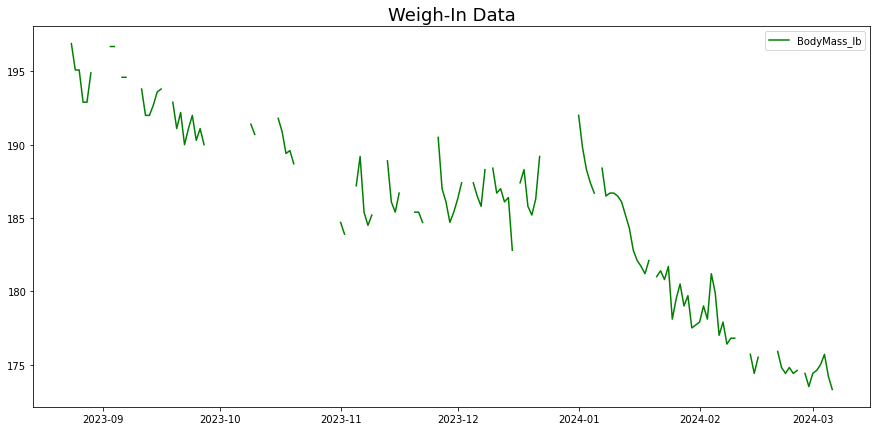

In [238]:
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['BodyMass_lb'], color='green', label = 'BodyMass_lb')
 
plt.title('Weigh-In Data')
plt.legend()
plt.show()

In [239]:
df['BodyMass_lb_inter'] = df['BodyMass_lb'].interpolate(option='spline')

In [240]:
df

,BodyMass_lb,StepCount_count,DistanceWalkingRunning_mi,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,FlightsClimbed_count,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,DietaryFatSaturated_g,...,DietarySelenium_mcg,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs,BodyMass_lb_inter
date,,,,,,,,,,,,,,,,,,,,,
2023-08-24,196.9,8895.0,4.163569,2055.322000,564.778000,24.0,159.745500,11.800000,9.500000,36.22030,...,9.000000,0.300000,1.100000,1572.000000,12.0,0.783333,5.558333,1.766667,0.266667,196.9
2023-08-25,195.1,9276.0,4.512434,2174.950000,793.380000,7.0,62.927500,0.000000,0.000000,10.81650,...,0.000000,0.000000,0.000000,0.000000,36.0,1.008333,3.700000,1.500000,0.133333,195.1
2023-08-26,195.1,10883.0,4.948209,2074.476000,395.387000,9.0,118.300000,8.300000,15.000000,39.50000,...,13.000000,0.500000,0.800000,1943.000000,8.0,1.400000,3.916667,1.558333,0.050000,195.1
2023-08-27,192.9,19174.0,9.909258,2187.383000,895.436000,14.0,79.930000,3.100000,2.900000,27.96000,...,18.000000,0.300000,0.500000,1986.000000,45.0,0.891667,5.566667,2.591667,0.066667,192.9
2023-08-28,192.9,13636.0,6.833914,2186.244000,901.549000,21.0,70.850000,4.600000,7.100000,16.30000,...,17.000000,0.300000,0.900000,455.000000,43.0,0.641667,5.275000,2.008333,0.158333,192.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-02,174.6,13416.0,6.533640,2048.925000,1651.989000,16.0,76.200000,2.400000,3.000000,25.00000,...,24.000000,0.300000,1.400000,1996.000000,148.0,0.863462,4.172222,1.510000,0.252308,174.6
2024-03-03,175.0,15876.0,7.722016,2048.189000,1443.215000,22.0,59.900000,1.300000,0.600000,9.70000,...,51.000000,0.400000,3.200000,1987.000000,173.0,1.108333,3.925000,1.966667,0.300000,175.0
2024-03-04,175.7,8191.0,4.051709,1983.933000,499.072000,4.0,87.700000,7.900000,9.900000,25.90000,...,58.000000,0.300000,2.800000,1023.000000,76.0,0.863462,4.172222,1.510000,0.252308,175.7


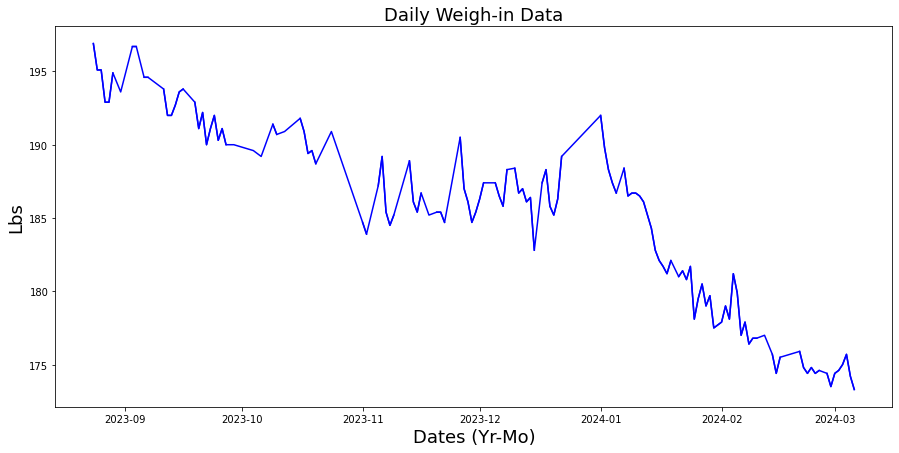

In [241]:
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['BodyMass_lb_inter'], color='blue', label = 'Interpolated_Data')
plt.plot(df['BodyMass_lb'], color='blue', label = 'Actual')

#plt.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%b"))

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('axes', titlesize=SMALL_SIZE, labelsize=MEDIUM_SIZE)

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#matplotlib.rc('font', size=BIGGER_SIZE)
#matplotlib.rc('axes', titlesize=BIGGER_SIZE)

plt.title('Daily Weigh-in Data')
plt.xlabel('Dates (Yr-Mo)')
plt.ylabel('Lbs')
#plt.legend()
plt.show()

In [242]:
#initialize a blank series series without the date index
series = df['BodyMass_lb_inter'].reset_index()

#loop through series and move the interpolated weight one index (data) up
for ind in range(0,len(series)-1):
    series.loc[ind, 'BodyMass_lb_inter'] = series.loc[ind+1, 'BodyMass_lb_inter']

#make the last value Nan    
series.loc[ind+1, 'BodyMass_lb_inter'] = np.NaN

#re-stablish date index
series.set_index('date', inplace = True)

#create new feature in df to represent the new lagged body mass
df['BodyMass_lb_inter'] = series['BodyMass_lb_inter']

In [243]:
df

,BodyMass_lb,StepCount_count,DistanceWalkingRunning_mi,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,FlightsClimbed_count,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,DietaryFatSaturated_g,...,DietarySelenium_mcg,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs,BodyMass_lb_inter
date,,,,,,,,,,,,,,,,,,,,,
2023-08-24,196.9,8895.0,4.163569,2055.322000,564.778000,24.0,159.745500,11.800000,9.500000,36.22030,...,9.000000,0.300000,1.100000,1572.000000,12.0,0.783333,5.558333,1.766667,0.266667,195.1
2023-08-25,195.1,9276.0,4.512434,2174.950000,793.380000,7.0,62.927500,0.000000,0.000000,10.81650,...,0.000000,0.000000,0.000000,0.000000,36.0,1.008333,3.700000,1.500000,0.133333,195.1
2023-08-26,195.1,10883.0,4.948209,2074.476000,395.387000,9.0,118.300000,8.300000,15.000000,39.50000,...,13.000000,0.500000,0.800000,1943.000000,8.0,1.400000,3.916667,1.558333,0.050000,192.9
2023-08-27,192.9,19174.0,9.909258,2187.383000,895.436000,14.0,79.930000,3.100000,2.900000,27.96000,...,18.000000,0.300000,0.500000,1986.000000,45.0,0.891667,5.566667,2.591667,0.066667,192.9
2023-08-28,192.9,13636.0,6.833914,2186.244000,901.549000,21.0,70.850000,4.600000,7.100000,16.30000,...,17.000000,0.300000,0.900000,455.000000,43.0,0.641667,5.275000,2.008333,0.158333,194.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-02,174.6,13416.0,6.533640,2048.925000,1651.989000,16.0,76.200000,2.400000,3.000000,25.00000,...,24.000000,0.300000,1.400000,1996.000000,148.0,0.863462,4.172222,1.510000,0.252308,175.0
2024-03-03,175.0,15876.0,7.722016,2048.189000,1443.215000,22.0,59.900000,1.300000,0.600000,9.70000,...,51.000000,0.400000,3.200000,1987.000000,173.0,1.108333,3.925000,1.966667,0.300000,175.7
2024-03-04,175.7,8191.0,4.051709,1983.933000,499.072000,4.0,87.700000,7.900000,9.900000,25.90000,...,58.000000,0.300000,2.800000,1023.000000,76.0,0.863462,4.172222,1.510000,0.252308,174.2


In [244]:
#let's create the weight difference in a new column
df['BodyMass_lb_diff'] = df['BodyMass_lb_inter'].diff() 

In [245]:
df

,BodyMass_lb,StepCount_count,DistanceWalkingRunning_mi,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,FlightsClimbed_count,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,DietaryFatSaturated_g,...,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs,BodyMass_lb_inter,BodyMass_lb_diff
date,,,,,,,,,,,,,,,,,,,,,
2023-08-24,196.9,8895.0,4.163569,2055.322000,564.778000,24.0,159.745500,11.800000,9.500000,36.22030,...,0.300000,1.100000,1572.000000,12.0,0.783333,5.558333,1.766667,0.266667,195.1,NaN
2023-08-25,195.1,9276.0,4.512434,2174.950000,793.380000,7.0,62.927500,0.000000,0.000000,10.81650,...,0.000000,0.000000,0.000000,36.0,1.008333,3.700000,1.500000,0.133333,195.1,0.0
2023-08-26,195.1,10883.0,4.948209,2074.476000,395.387000,9.0,118.300000,8.300000,15.000000,39.50000,...,0.500000,0.800000,1943.000000,8.0,1.400000,3.916667,1.558333,0.050000,192.9,-2.2
2023-08-27,192.9,19174.0,9.909258,2187.383000,895.436000,14.0,79.930000,3.100000,2.900000,27.96000,...,0.300000,0.500000,1986.000000,45.0,0.891667,5.566667,2.591667,0.066667,192.9,0.0
2023-08-28,192.9,13636.0,6.833914,2186.244000,901.549000,21.0,70.850000,4.600000,7.100000,16.30000,...,0.300000,0.900000,455.000000,43.0,0.641667,5.275000,2.008333,0.158333,194.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-02,174.6,13416.0,6.533640,2048.925000,1651.989000,16.0,76.200000,2.400000,3.000000,25.00000,...,0.300000,1.400000,1996.000000,148.0,0.863462,4.172222,1.510000,0.252308,175.0,0.4
2024-03-03,175.0,15876.0,7.722016,2048.189000,1443.215000,22.0,59.900000,1.300000,0.600000,9.70000,...,0.400000,3.200000,1987.000000,173.0,1.108333,3.925000,1.966667,0.300000,175.7,0.7
2024-03-04,175.7,8191.0,4.051709,1983.933000,499.072000,4.0,87.700000,7.900000,9.900000,25.90000,...,0.300000,2.800000,1023.000000,76.0,0.863462,4.172222,1.510000,0.252308,174.2,-1.5


In [246]:
#provide the first differenced entry
df.iloc[0,len(df.columns)-1] = df.iloc[0,len(df.columns)-2] - df.iloc[0,0]

In [247]:
df

,BodyMass_lb,StepCount_count,DistanceWalkingRunning_mi,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,FlightsClimbed_count,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,DietaryFatSaturated_g,...,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs,BodyMass_lb_inter,BodyMass_lb_diff
date,,,,,,,,,,,,,,,,,,,,,
2023-08-24,196.9,8895.0,4.163569,2055.322000,564.778000,24.0,159.745500,11.800000,9.500000,36.22030,...,0.300000,1.100000,1572.000000,12.0,0.783333,5.558333,1.766667,0.266667,195.1,-1.8
2023-08-25,195.1,9276.0,4.512434,2174.950000,793.380000,7.0,62.927500,0.000000,0.000000,10.81650,...,0.000000,0.000000,0.000000,36.0,1.008333,3.700000,1.500000,0.133333,195.1,0.0
2023-08-26,195.1,10883.0,4.948209,2074.476000,395.387000,9.0,118.300000,8.300000,15.000000,39.50000,...,0.500000,0.800000,1943.000000,8.0,1.400000,3.916667,1.558333,0.050000,192.9,-2.2
2023-08-27,192.9,19174.0,9.909258,2187.383000,895.436000,14.0,79.930000,3.100000,2.900000,27.96000,...,0.300000,0.500000,1986.000000,45.0,0.891667,5.566667,2.591667,0.066667,192.9,0.0
2023-08-28,192.9,13636.0,6.833914,2186.244000,901.549000,21.0,70.850000,4.600000,7.100000,16.30000,...,0.300000,0.900000,455.000000,43.0,0.641667,5.275000,2.008333,0.158333,194.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-02,174.6,13416.0,6.533640,2048.925000,1651.989000,16.0,76.200000,2.400000,3.000000,25.00000,...,0.300000,1.400000,1996.000000,148.0,0.863462,4.172222,1.510000,0.252308,175.0,0.4
2024-03-03,175.0,15876.0,7.722016,2048.189000,1443.215000,22.0,59.900000,1.300000,0.600000,9.70000,...,0.400000,3.200000,1987.000000,173.0,1.108333,3.925000,1.966667,0.300000,175.7,0.7
2024-03-04,175.7,8191.0,4.051709,1983.933000,499.072000,4.0,87.700000,7.900000,9.900000,25.90000,...,0.300000,2.800000,1023.000000,76.0,0.863462,4.172222,1.510000,0.252308,174.2,-1.5


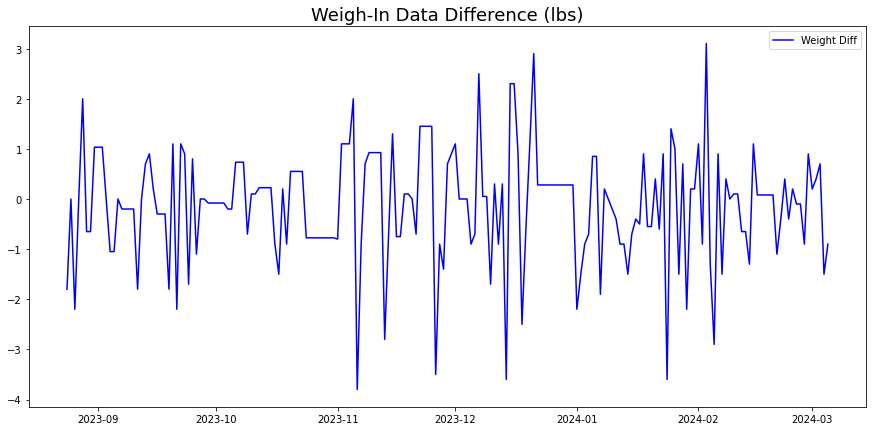

In [248]:
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['BodyMass_lb_diff'], color='blue', label = 'Weight Diff')

plt.title('Weigh-In Data Difference (lbs)')
plt.legend()
plt.show()

In [249]:
new_df = df.dropna(subset=['BodyMass_lb_diff'])

In [250]:
new_df

,BodyMass_lb,StepCount_count,DistanceWalkingRunning_mi,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,FlightsClimbed_count,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,DietaryFatSaturated_g,...,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs,BodyMass_lb_inter,BodyMass_lb_diff
date,,,,,,,,,,,,,,,,,,,,,
2023-08-24,196.9,8895.0,4.163569,2055.322,564.7780,24.0,159.7455,11.8,9.5,36.2203,...,0.3,1.1,1572.0,12.0,0.783333,5.558333,1.766667,0.266667,195.1,-1.8
2023-08-25,195.1,9276.0,4.512434,2174.950,793.3800,7.0,62.9275,0.0,0.0,10.8165,...,0.0,0.0,0.0,36.0,1.008333,3.700000,1.500000,0.133333,195.1,0.0
2023-08-26,195.1,10883.0,4.948209,2074.476,395.3870,9.0,118.3000,8.3,15.0,39.5000,...,0.5,0.8,1943.0,8.0,1.400000,3.916667,1.558333,0.050000,192.9,-2.2
2023-08-27,192.9,19174.0,9.909258,2187.383,895.4360,14.0,79.9300,3.1,2.9,27.9600,...,0.3,0.5,1986.0,45.0,0.891667,5.566667,2.591667,0.066667,192.9,0.0
2023-08-28,192.9,13636.0,6.833914,2186.244,901.5490,21.0,70.8500,4.6,7.1,16.3000,...,0.3,0.9,455.0,43.0,0.641667,5.275000,2.008333,0.158333,194.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,174.4,9326.0,4.625470,2004.932,542.6680,14.0,94.9000,5.6,10.7,22.2000,...,0.7,3.3,2447.0,12.0,0.700000,4.475000,1.683333,2.525000,174.6,0.2
2024-03-02,174.6,13416.0,6.533640,2048.925,1651.9890,16.0,76.2000,2.4,3.0,25.0000,...,0.3,1.4,1996.0,148.0,0.863462,4.172222,1.510000,0.252308,175.0,0.4
2024-03-03,175.0,15876.0,7.722016,2048.189,1443.2150,22.0,59.9000,1.3,0.6,9.7000,...,0.4,3.2,1987.0,173.0,1.108333,3.925000,1.966667,0.300000,175.7,0.7


In [251]:
new_df['BodyMass_lb_diff'].isna().sum()

0

Now that we have differenced the data, and have nothing null, let's go ahead and test for Dickey-Fuller

In [252]:
dftest = adfuller(new_df['BodyMass_lb_diff'])

In [253]:
 # Print Dickey-Fuller test results
print('Results of Dickey-Fuller Test: \n')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
    

Results of Dickey-Fuller Test: 

Test Statistic                -9.581410e+00
p-value                        2.153488e-16
#Lags Used                     3.000000e+00
Number of Observations Used    1.910000e+02
Critical Value (1%)           -3.465059e+00
Critical Value (5%)           -2.876794e+00
Critical Value (10%)          -2.574901e+00
dtype: float64


With a P-Value close to 0 this data is considered stationary. This looks good. We don't need any more decomposition before we begin our analysis.

We can inspect the autocorrelation and partial autocorrelation plots to further inspect.

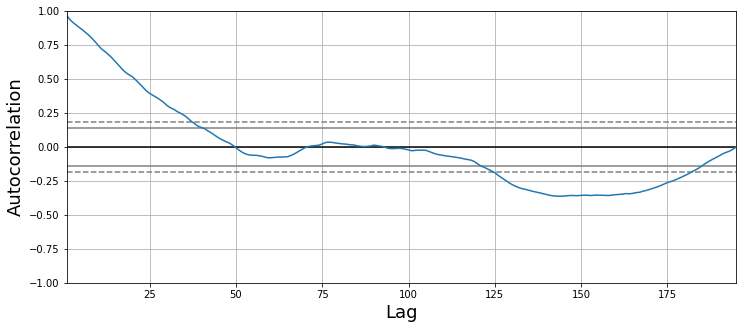

In [254]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(new_df['BodyMass_lb_inter']);


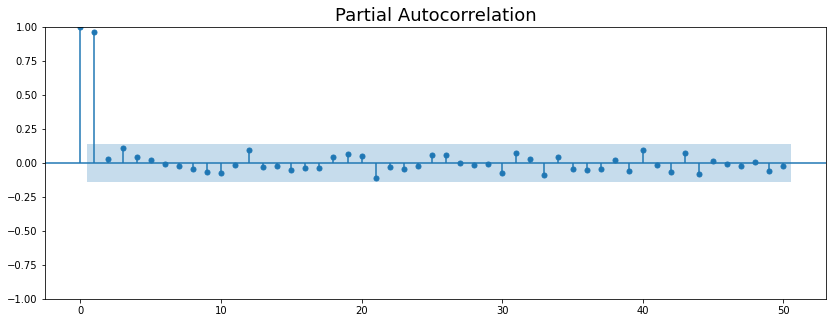

In [255]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(new_df['BodyMass_lb_inter'], lags=50);

Both plots look pretty stationary. So that's great. Also, both plots trail off with time. Our PACF plot shows high correlation with the 1st order, which is exactly what we would expect. It proves that our differenced model is exactly what we care about, which is what we already knew - the difference in what we weigh from one day to the next is what we care about.

So, we're confirmed we have a stationary plot. We can do more exploration and return to Time Response at a later data. 
To implement time response, we would first need to implement a linear regression prediction model to see if we can find a trend in the data. After all, there was a slight trend in the negative direction because there was weight loss. So, let's see if we can generate a linear regression model, and go from there.

### Feature Engineering
So, now that we added have scrubbed our data. We're going to create a few different target variables, all in the name of weight loss. The first, will be just the difference of our weight loss from day to day. The second, will be the residuals from our predicted

In [256]:
#let's separate our target and feature columns.
#df['diff_inter'] = arma_inter_resid
df['BodyMass_lb_raw'] = df['BodyMass_lb']

#df.drop('BodyMass_lb', axis = 1, inplace = True)

Let's move the interpolated weight up an index. Let's also drop our Nans on the last row

In [257]:
#drop NAs from the last row
df = df.dropna(subset=['BodyMass_lb_diff'])

We can also use this time to make a category to determine if weight loss occurred. This is relatively simple. Let's call it weight loss, and we'll give it a 1, if there's was weight loss, and 0 if there wasn't. In this scenario, even 0 lbs would be the same as weight gain.

In [258]:
df.loc[:,'weight_loss'] = df.loc[:,'BodyMass_lb_diff'] < 0.01
df.loc[:,'weight_loss'] = df.loc[:,'weight_loss'].astype(int)

<ipython-input-258-26c56e2d7ee3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'weight_loss'] = df.loc[:,'BodyMass_lb_diff'] < 0.01


In [259]:
weight_days = pd.DataFrame(df[df['weight_loss'] == 1]['weight_loss'].resample('M').count())
weight_days['weight_gain'] = df[df['weight_loss'] == 0]['weight_loss'].resample('M').count()
weight_days.reset_index(inplace = True)

In [260]:
#weight_days['date'] = weight_days['date'].dt.month
weight_days['date'] = weight_days['date'].dt.month_name().str[:3]

In [261]:
weight_days.set_index('date', inplace = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Aug'),
  Text(1, 0, 'Sep'),
  Text(2, 0, 'Oct'),
  Text(3, 0, 'Nov'),
  Text(4, 0, 'Dec'),
  Text(5, 0, 'Jan'),
  Text(6, 0, 'Feb'),
  Text(7, 0, 'Mar')])

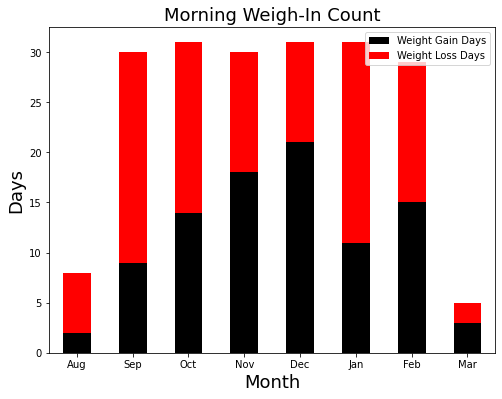

In [262]:
fig, ax = plt.subplots(figsize=(8,6))

ax = weight_days['weight_gain'].plot.bar(color='black', label = 'Weight Gain Days')
ax = weight_days['weight_loss'].plot.bar(bottom = weight_days['weight_gain'], color ='red', label = 'Weight Loss Days')

ax.set_title('Morning Weigh-In Count')
ax.set_xlabel('Month')
ax.set_ylabel('Days')
ax.legend()
plt.xticks(rotation=None)

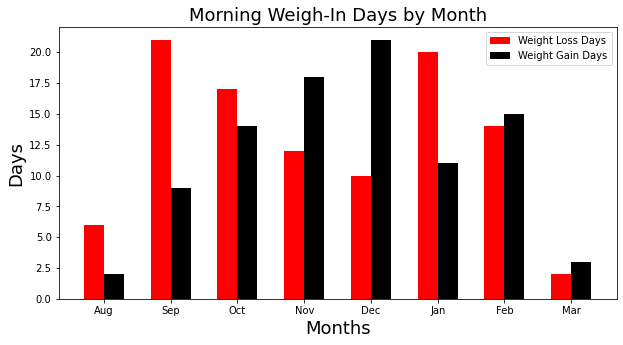

In [263]:
# Specify the values of blue bars (height)
weight_gain = weight_days['weight_gain']

# Specify the values of orange bars (height)
weight_loss = weight_days['weight_loss']

# Position of bars on x-axis
ind = np.arange(len(weight_days['weight_gain']))

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, weight_loss, width, label='Weight Loss Days', color = 'red')
plt.bar(ind + width, weight_gain, width, label='Weight Gain Days', color = 'black')

plt.xlabel('Months')
plt.ylabel('Days')
plt.title('Morning Weigh-In Days by Month')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width/2, weight_days.index)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [264]:
weight_days.loc['totals'] = [weight_days['weight_loss'].sum(), weight_days['weight_gain'].sum()]
weight_days

,weight_loss,weight_gain
date,,
Aug,6,2
Sep,21,9
Oct,17,14
Nov,12,18
Dec,10,21
Jan,20,11
Feb,14,15
Mar,2,3
totals,102,93


### PCA
Now that we have all of these feature variables, and we believe we're in good shape. Let's figure out if there's any PCA or correlation issues with our data. To do that, we'll separate between what the potential targets are from the features.

In [265]:
targets = df.loc[:,'BodyMass_lb_inter':'weight_loss']
features = df.loc[:,'StepCount_count':'SleepAnalysis_Awake_hrs']

Now that we've done that, let's review the correlation of the features via a heatmap. We will utilize the heatmap function. We'll use the standardization of the data here.

In [266]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler() 
features_std = pd.DataFrame(scaler_std.fit_transform(features), columns = features.columns)

<Axes: >

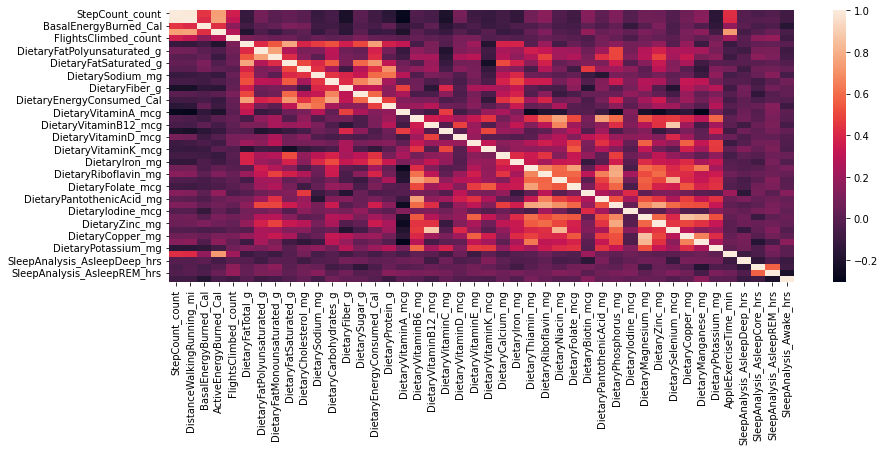

In [267]:
# Your code here
import seaborn as sns
sns.heatmap(features_std.corr())

In [268]:
#let's try to analyze the PCA's here
from sklearn.decomposition import PCA

pca_1 = PCA(n_components=12)
pca_2 = PCA(n_components=24)
pca_3 = PCA(n_components=36)

principalComponents = pca_1.fit_transform(features_std)
principalComponents = pca_2.fit_transform(features_std)
principalComponents = pca_3.fit_transform(features_std)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))


0.7718141093403272
0.9424805670117009
0.9928075952307182


Wow, okay, so we can maintain about 80% of our data through 12 components, down from 45. At the same time, a lot of correlation (the heat in our correlation map). It's probably a good time to delve into the data a bit more. Previously, we divided our data into dietary, exercise, and sleep. It turns out, we may need to create further subsets through segmenting. 

### SEGMENTING FEATURE DATA
In order to better sort all of the correlation here, it might be a good time to segment the data. To do this, we'll utilize a heirarchal arrangement of data points.

![data_heirarchy](images/data_heirarchy.png)

For dietary information, it's useful to think of it in levels. It starts with Level 1 - `DietaryEnergyConsumed_Cal`, from there we go to Level 2 - macronutrients  `DietaryFatTotals_g`, `DietaryCarbohydrates_g`, `DietaryProtein_g`. But fortunately for us, we have, what I call, Level 3 - sub-macronutrients still measured in grams, which includes things like `DietarySugar_g` which is a carbohydrate, and `DietarySaturatedFats_g` which is a fat. Going further, we have micronutrients, or Level 4 - measured in milligrams (or even micrograms) of things like `DietarySodium_mg` and `DietaryCholesterol_mg`.

Same with sleep. With sleep, we have level 2 data - REM, Core, Deep. We also have awake hours as well. Level 1 data, if we wanted it, would consist of the total hours of sleep we got. So, if we chose to include only Level 1 diet data in our analysis, it might be better to be consistent with sleep as well. Same with exercise. We have basal and active calories, or Level 2, and we have exercise minutes. Exercise minutes are even a collary category of workout. 

There's a big correlative overlap between Level 1, 2, & 3. So, we have to make a decision on what we want to include. Given where we are, let's start with Level 1 and go from there.

To do that, let's create these categories of sub-data. For sleep, we'll have to feature engineer to add it.

In [269]:
#let's add totals for sleep and energy burned
df.loc[:,'SleepAnalysis_AsleepTotal_hrs'] = df.loc[:,'SleepAnalysis_AsleepDeep_hrs'] + df.loc[:,'SleepAnalysis_AsleepCore_hrs'] + df.loc[:,'SleepAnalysis_AsleepREM_hrs']
df.loc[:,'TotalEnergyBurned_Cal'] = df.loc[:,'BasalEnergyBurned_Cal'] + df.loc[:,'ActiveEnergyBurned_Cal']


<ipython-input-269-33e7c8ea61eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'SleepAnalysis_AsleepTotal_hrs'] = df.loc[:,'SleepAnalysis_AsleepDeep_hrs'] + df.loc[:,'SleepAnalysis_AsleepCore_hrs'] + df.loc[:,'SleepAnalysis_AsleepREM_hrs']
<ipython-input-269-33e7c8ea61eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'TotalEnergyBurned_Cal'] = df.loc[:,'BasalEnergyBurned_Cal'] + df.loc[:,'ActiveEnergyBurned_Cal']


In [270]:
#combine all 3 - Level 1 
level_1 = ['DietaryEnergyConsumed_Cal', 'TotalEnergyBurned_Cal', 'SleepAnalysis_AsleepTotal_hrs']
level_1_diet = ['DietaryEnergyConsumed_Cal']
level_1_exer = ['TotalEnergyBurned_Cal']
level_1_sleep = ['SleepAnalysis_AsleepTotal_hrs']

feature_1 = df[level_1]

<Axes: >

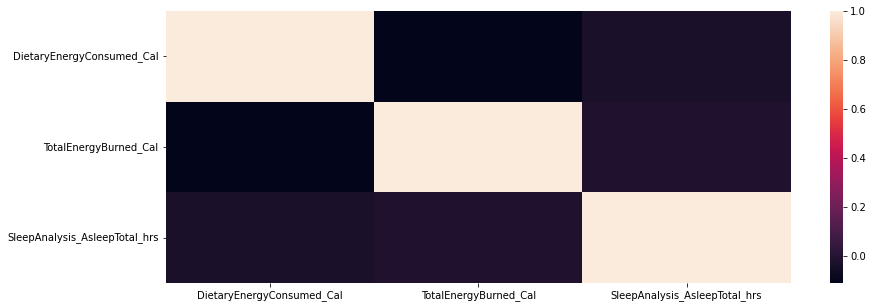

In [271]:
import seaborn as sns
sns.heatmap(feature_1.corr())

aha, so very little correlation between dietary energy, total energy, and sleep analysis. Now, let's run some models on our data and see which performs the best. Because we're worried about whether we've gained weight or lost weight, accuracy is going to be or relevant prediction.

### Level 1 Features - Algorithms. 

We'll start with KNN, Logistic Regression, Decision Tree, Naive Bayes, SVM, and Neural Network. We'll report our Confusion Matrix as well as a cross validation of our accuracy score.

#### Baseline Random Algorithm
Prior to that, let's perform a very simple, random test, to randomly select whether an observation is a weight loss day or a weight gain day.

In [272]:
#import random module
import random

#initialize baseline dataframe from the weight loss column
baseline = pd.DataFrame(df['weight_loss'])

#create a predictions column that randomly chooses 0 or 1
baseline['Predictions'] = [random.randrange(0, 2, 1) for i in range(len(baseline['weight_loss']))]

#create another column which determines which are correct
baseline['Correct?'] = (baseline['weight_loss'] == baseline['Predictions'])

#count the true and false answers
baseline['Correct?'].value_counts(normalize=True)

Correct?
False    0.553846
True     0.446154
Name: proportion, dtype: float64

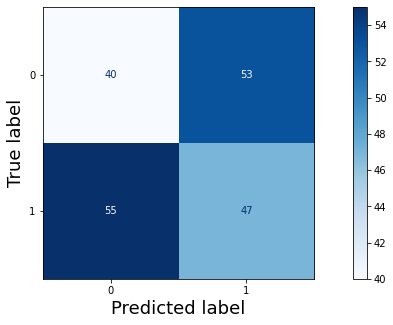

In [273]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

target = baseline['weight_loss']
preds = baseline['Predictions']

cnf = confusion_matrix(target, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf)
disp.plot(cmap=plt.cm.Blues)

This make sense, as we have a 50-50 model with skew towards more True Positives, which is predicting weight loss (Label = 1). Recall that we have more weight loss days than weight gain days. Let's see how this compares with our evaluation metrics.

In [274]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(target, preds)

Precision Score: 0.47
Recall Score: 0.46078431372549017
Accuracy Score: 0.4461538461538462
F1 Score: 0.46534653465346537


So, we have what we thought... a roughly 50-50 model which skews higher in precision because we have more weight loss days.okay, let's create a dataframe, called level 1, which puts our results in a dataframe.

In [275]:
level_1_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'Accuracy', 'F1', 'Cross-Val-Acc'])
level_1_df.loc[0] = ['Baseline - Random',
                  precision_score(target, preds), 
                  recall_score(target, preds), 
                  accuracy_score(target, preds), 
                  f1_score(target, preds),
                  'N/A']
level_1_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,Baseline - Random,0.47,0.460784,0.446154,0.465347,N/A


okay, now let's go ahead and create something for each algorithm. Remember, we have KNN

#### KNN (Level 1 Data)
Prior to that, let's perform a very simple, random test, to randomly select whether an observation is a weight loss day or a weight gain day.

In [276]:
# Import train_test_split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(feature_1, df['weight_loss'], random_state = 42, test_size = .25)

In [277]:
def scoring (name, model, X_train, X_test, y_train, y_test):
    preds = model.predict(X_test)
    val_score = cross_val_score(model, X_train, y_train, cv=5) #5 fold cross validation
    eval_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'Accuracy', 'F1', 'Cross-Val-Acc'])
    eval_df.loc[0] = [name,
                  precision_score(y_test, preds), 
                  recall_score(y_test, preds), 
                  accuracy_score(y_test, preds), 
                  f1_score(y_test, preds),
                  val_score.mean()]
    return eval_df

In [278]:
def nn_scoring (name, model, X_test, y_test):
    
    preds = np.round(model.predict(X_test))
#    val_score = cross_val_score(model, X_train, y_train, cv=5) #5 fold cross validation
    eval_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'Accuracy', 'F1', 'Cross-Val-Acc'])
    eval_df.loc[0] = [name,
                  precision_score(y_test, preds), 
                  recall_score(y_test, preds), 
                  accuracy_score(y_test, preds), 
                  f1_score(y_test, preds),
                  'n/a']
    return eval_df

In [279]:
def find_best_knn(name, X_train, X_test, y_train, y_test):
    
    # Instantiate StandardScaler
    scaler = StandardScaler()

    # Transform the training and test sets
    scaled_data_train = scaler.fit_transform(X_train)
    scaled_data_test = scaler.fit_transform(X_test)
    
    #algorithm for k
    best_k = 0
    best_score = 0.0
    min_k=1
    max_k=25
    
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1

    # Instantiate KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=best_k)

    # Fit the classifier
    knn.fit(scaled_data_train, y_train)
    
    results = scoring ((f'{name}, k = {best_k}'), knn, scaled_data_train, scaled_data_test, y_train, y_test)
    return results

In [280]:
results = find_best_knn('knn', X_train, X_test, y_train, y_test)
level_1_df = level_1_df._append(results, ignore_index = True)

In [281]:
level_1_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,Baseline - Random,0.47,0.460784,0.446154,0.465347,N/A
1,"knn, k = 19",0.72,0.600000,0.612245,0.654545,0.637241


### Logistic Regression

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Build a pipeline with StandardScaler and Logistic Regression
lr_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('LR', LogisticRegression(random_state=42))])

# Define the grid
grid = [{'LR__C': [1, 1E6, 1E12], 
         'LR__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}] 

# Define a grid search
gridsearch = GridSearchCV(estimator=lr_pipeline, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

results = scoring ((f'logreg'), gridsearch, X_train, X_test, y_train, y_test)
level_1_df = level_1_df._append(results, ignore_index = True)

In [283]:
level_1_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,Baseline - Random,0.470000,0.460784,0.446154,0.465347,N/A
1,"knn, k = 19",0.720000,0.600000,0.612245,0.654545,0.637241
2,logreg,0.703704,0.633333,0.612245,0.666667,0.685057


### Decision Tree

In [284]:
from sklearn.tree import DecisionTreeClassifier

# Build a pipeline with StandardScaler and DecisionTree
dt_pipeline = Pipeline([('DT', DecisionTreeClassifier())])

# Define the grid
grid = [{'DT__criterion': ['gini', 'entropy'],
         'DT__max_depth': [2, 4, 6],
         'DT__min_samples_split': [5, 10, 15]}] 

# Define a grid search
gridsearch = GridSearchCV(estimator=dt_pipeline, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit the training data
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('DT', DecisionTreeClassifier())]),
             param_grid=[{'DT__criterion': ['gini', 'entropy'],
                          'DT__max_depth': [2, 4, 6],
                          'DT__min_samples_split': [5, 10, 15]}],
             scoring='accuracy')

In [285]:
results = scoring ('dec_tree', gridsearch, X_train, X_test, y_train, y_test)
level_1_df = level_1_df._append(results, ignore_index = True)

In [286]:
level_1_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,Baseline - Random,0.470000,0.460784,0.446154,0.465347,N/A
1,"knn, k = 19",0.720000,0.600000,0.612245,0.654545,0.637241
2,logreg,0.703704,0.633333,0.612245,0.666667,0.685057
3,dec_tree,0.736842,0.466667,0.571429,0.571429,0.69908


### Naive Bayes

In [287]:
from sklearn.naive_bayes import GaussianNB

# Build a pipeline with StandardScaler and Logistic Regression
GNB_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('GNB', GaussianNB())]) 

# Define parameters
parameters = {
    'GNB__priors': [None],
    'GNB__var_smoothing': [0.00000001, 0.000000001, 0.00000001]}

# Define a grid search
gridsearch = GridSearchCV(estimator=GNB_pipeline,
                          param_grid=parameters,
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

results = scoring ((f'GNB'), gridsearch, X_train, X_test, y_train, y_test)
level_1_df = level_1_df._append(results, ignore_index = True)

### SVM

In [288]:
from sklearn import svm

# Build a pipeline with StandardScaler and Logistic Regression
SVM_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('SVM', svm.SVC(kernel='linear'))]) 

# Define parameters
parameters = {
    'SVM__coef0': [0.01, 1, 10],
    'SVM__gamma': [0.001, 0.01, 0.1]}

# Define a grid search
gridsearch = GridSearchCV(estimator=SVM_pipeline,
                          param_grid=parameters,
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

results = scoring ((f'SVM'), gridsearch, X_train, X_test, y_train, y_test)
level_1_df = level_1_df._append(results, ignore_index = True)

In [289]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [290]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.fit_transform(X_test)

In [291]:
model_1 = Sequential()

#we'll start with 10 neurons, and an input shape of 14
model_1.add(Dense(8, activation='tanh', input_shape=(3,)))
model_1.add(Dense(4, activation='tanh'))
model_1.add(Dense(2, activation='tanh'))

#output classification layer
model_1.add(Dense(1, activation='sigmoid'))

In [292]:
from keras import optimizers
# Compile the model
model_1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=[tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)])

In [293]:
#fit model
results_1  = model_1.fit(scaled_data_train,
                    y_train,
                    epochs=100,
                    validation_split=0.25)

Epoch 1/100
4/4 [==============================] - 1s 77ms/step - loss: 0.7549 - binary_accuracy: 0.2569 - val_loss: 0.7363 - val_binary_accuracy: 0.3243
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.7518 - binary_accuracy: 0.2844 - val_loss: 0.7338 - val_binary_accuracy: 0.3514
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.7492 - binary_accuracy: 0.2936 - val_loss: 0.7312 - val_binary_accuracy: 0.3514
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 0.7467 - binary_accuracy: 0.2661 - val_loss: 0.7297 - val_binary_accuracy: 0.3514
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.7443 - binary_accuracy: 0.2752 - val_loss: 0.7271 - val_binary_accuracy: 0.3514
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 0.7415 - binary_accuracy: 0.2936 - val_loss: 0.7249 - val_binary_accuracy: 0.3514
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.73

Epoch 54/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6570 - binary_accuracy: 0.6422 - val_loss: 0.6718 - val_binary_accuracy: 0.6486
Epoch 55/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6556 - binary_accuracy: 0.6422 - val_loss: 0.6711 - val_binary_accuracy: 0.6486
Epoch 56/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6543 - binary_accuracy: 0.6422 - val_loss: 0.6707 - val_binary_accuracy: 0.6486
Epoch 57/100
4/4 [==============================] - 0s 17ms/step - loss: 0.6533 - binary_accuracy: 0.6514 - val_loss: 0.6707 - val_binary_accuracy: 0.6486
Epoch 58/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6520 - binary_accuracy: 0.6514 - val_loss: 0.6702 - val_binary_accuracy: 0.6486
Epoch 59/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6509 - binary_accuracy: 0.6514 - val_loss: 0.6698 - val_binary_accuracy: 0.6486
Epoch 60/100
4/4 [==============================] - 0s 16ms/step - los

In [294]:
#scoring for NN
preds = np.round(model_1.predict(scaled_data_test))


#    val_score = cross_val_score(model, X_train, y_train, cv=5) #5 fold cross validation
eval_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'Accuracy', 'F1', 'Cross-Val-Acc'])


eval_df.loc[0] = ['NN',
                  precision_score(y_test, preds), 
                  recall_score(y_test, preds), 
                  accuracy_score(y_test, preds), 
                  f1_score(y_test, preds),
                  'n/a']
level_1_df = level_1_df._append(eval_df, ignore_index = True)

2/2 [==============================] - 0s 4ms/step


In [295]:
level_1_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,Baseline - Random,0.470000,0.460784,0.446154,0.465347,N/A
1,"knn, k = 19",0.720000,0.600000,0.612245,0.654545,0.637241
2,logreg,0.703704,0.633333,0.612245,0.666667,0.685057
3,dec_tree,0.736842,0.466667,0.571429,0.571429,0.69908
4,GNB,0.703704,0.633333,0.612245,0.666667,0.712414
5,SVM,0.655172,0.633333,0.571429,0.644068,0.698621
6,NN,0.678571,0.633333,0.591837,0.655172,n/a


OKay, so, kind of a mixed bag. OUr best F1 and accuracy scores came from GNB and Log Reg. Let's look at feature 2 and see if we can see anything better.

### Level 2

Recall our Level 2 data. We have the next layer of macronutrients, exercise, and sleep. We'll do the same thing we did above. Will run through each model and see if anything pops out.

In [296]:
#combine - Level 2
level_2_diet = ['DietaryFatTotal_g', 'DietaryProtein_g', 'DietaryCarbohydrates_g']
level_2_exer = ['BasalEnergyBurned_Cal','ActiveEnergyBurned_Cal']
level_2_sleep = ['SleepAnalysis_AsleepDeep_hrs','SleepAnalysis_AsleepCore_hrs','SleepAnalysis_AsleepREM_hrs', 'SleepAnalysis_Awake_hrs']
level_2 = level_2_diet + level_2_exer + level_2_sleep
feature_2 = df[level_2]

<Axes: >

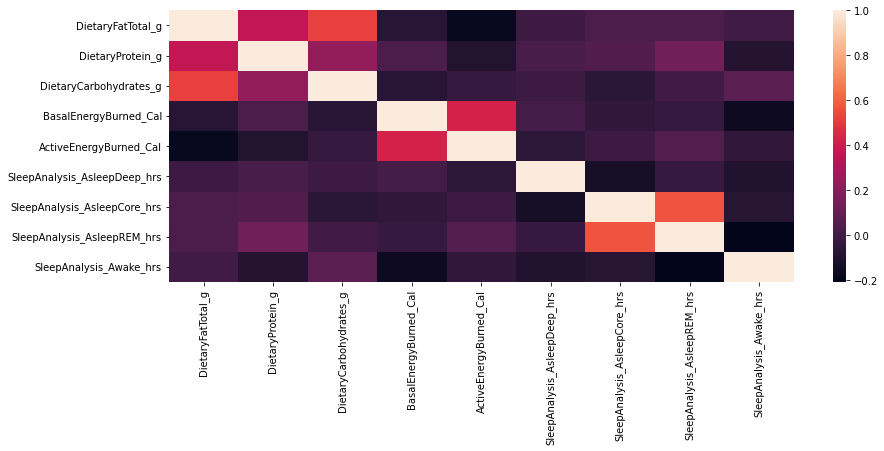

In [297]:
import seaborn as sns
sns.heatmap(feature_2.corr())

So, there is some correlation between these sublayers. There appears to be correlation between Protein and Fat, Carbs and Fat, Basal and Active Calories, and Core and REM sleep. Let's go ahead and split the data, and run through our algorithms. Then we'll put them in a spreadsheet.

In [298]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(feature_2, df['weight_loss'], random_state = 42, test_size = .25)

### KNN

In [299]:
results = find_best_knn('knn', X_train, X_test, y_train, y_test)
level_2_df = results

### Logistic Regression

In [300]:
# Build a pipeline with StandardScaler and Logistic Regression
lr_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('LR', LogisticRegression(random_state=42))])

# Define the grid
grid = [{'LR__C': [1, 1E6, 1E12], 
         'LR__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}] 

# Define a grid search
gridsearch = GridSearchCV(estimator=lr_pipeline, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

results = scoring ((f'logreg'), gridsearch, X_train, X_test, y_train, y_test)
level_2_df = level_2_df._append(results, ignore_index = True)

In [301]:
level_2_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,"knn, k = 21",0.680000,0.566667,0.571429,0.618182,0.671494
1,logreg,0.545455,0.400000,0.428571,0.461538,0.651034


### Decision Tree

In [302]:
# Build a pipeline with StandardScaler and DecisionTree
dt_pipeline = Pipeline([('DT', DecisionTreeClassifier())])

# Define the grid
grid = [{'DT__criterion': ['gini', 'entropy'],
         'DT__max_depth': [2, 3, 4, 5, 6],
         'DT__min_samples_split': [5, 10, 15]}] 

# Define a grid search
gridsearch = GridSearchCV(estimator=dt_pipeline, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit the training data
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('DT', DecisionTreeClassifier())]),
             param_grid=[{'DT__criterion': ['gini', 'entropy'],
                          'DT__max_depth': [2, 3, 4, 5, 6],
                          'DT__min_samples_split': [5, 10, 15]}],
             scoring='accuracy')

In [303]:
results = scoring ('dec_tree', gridsearch, X_train, X_test, y_train, y_test)
level_2_df = level_2_df._append(results, ignore_index = True)

### SVM

In [304]:
# Build a pipeline with StandardScaler and Logistic Regression
SVM_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('SVM', svm.SVC(kernel='linear'))]) 

# Define parameters
parameters = {
    'SVM__coef0': [0.01, 1, 10],
    'SVM__gamma': [0.001, 0.01, 0.1]}

# Define a grid search
gridsearch = GridSearchCV(estimator=SVM_pipeline,
                          param_grid=parameters,
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

results = scoring ((f'SVM'), gridsearch, X_train, X_test, y_train, y_test)
level_2_df = level_2_df._append(results, ignore_index = True)

In [305]:
level_2_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,"knn, k = 21",0.680000,0.566667,0.571429,0.618182,0.671494
1,logreg,0.545455,0.400000,0.428571,0.461538,0.651034
2,dec_tree,0.789474,0.500000,0.612245,0.612245,0.732644
3,SVM,0.590909,0.433333,0.469388,0.500000,0.650805


### GNB

In [306]:
# Build a pipeline with StandardScaler and Logistic Regression
GNB_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('GNB', GaussianNB())]) 

# Define parameters
parameters = {
    'GNB__priors': [None],
    'GNB__var_smoothing': [0.00000001, 0.000000001, 0.00000001]}

# Define a grid search
gridsearch = GridSearchCV(estimator=GNB_pipeline,
                          param_grid=parameters,
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

results = scoring ((f'GNB'), gridsearch, X_train, X_test, y_train, y_test)
level_2_df = level_2_df._append(results, ignore_index = True)

In [307]:
level_2_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,"knn, k = 21",0.680000,0.566667,0.571429,0.618182,0.671494
1,logreg,0.545455,0.400000,0.428571,0.461538,0.651034
2,dec_tree,0.789474,0.500000,0.612245,0.612245,0.732644
3,SVM,0.590909,0.433333,0.469388,0.500000,0.650805
4,GNB,0.700000,0.466667,0.551020,0.560000,0.644368


### Nueral Network

In [308]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.fit_transform(X_test)

In [309]:
model_1 = Sequential()

#we'll start with 10 neurons, and an input shape of 14
model_1.add(Dense(8, activation='tanh', input_shape=(9,)))
model_1.add(Dense(4, activation='tanh'))
model_1.add(Dense(2, activation='tanh'))

#output classification layer
model_1.add(Dense(1, activation='sigmoid'))

In [310]:
from keras import optimizers
# Compile the model
model_1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=[tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)])

In [311]:
#fit model
results_1  = model_1.fit(scaled_data_train,
                    y_train,
                    epochs=20,
                    validation_split=0.25)

Epoch 1/20
4/4 [==============================] - 1s 73ms/step - loss: 0.7364 - binary_accuracy: 0.3578 - val_loss: 0.7467 - val_binary_accuracy: 0.4054
Epoch 2/20
4/4 [==============================] - 0s 14ms/step - loss: 0.7346 - binary_accuracy: 0.3670 - val_loss: 0.7455 - val_binary_accuracy: 0.4054
Epoch 3/20
4/4 [==============================] - 0s 16ms/step - loss: 0.7326 - binary_accuracy: 0.3670 - val_loss: 0.7444 - val_binary_accuracy: 0.4054
Epoch 4/20
4/4 [==============================] - 0s 17ms/step - loss: 0.7307 - binary_accuracy: 0.3761 - val_loss: 0.7431 - val_binary_accuracy: 0.3784
Epoch 5/20
4/4 [==============================] - 0s 16ms/step - loss: 0.7289 - binary_accuracy: 0.3670 - val_loss: 0.7420 - val_binary_accuracy: 0.3784
Epoch 6/20
4/4 [==============================] - 0s 15ms/step - loss: 0.7273 - binary_accuracy: 0.3761 - val_loss: 0.7412 - val_binary_accuracy: 0.3784
Epoch 7/20
4/4 [==============================] - 0s 19ms/step - loss: 0.7254 - bi

In [312]:
results = nn_scoring ('nn', model_1, scaled_data_test, y_test)
level_2_df = level_2_df._append(results, ignore_index = True)

2/2 [==============================] - 0s 3ms/step


In [313]:
level_2_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,"knn, k = 21",0.680000,0.566667,0.571429,0.618182,0.671494
1,logreg,0.545455,0.400000,0.428571,0.461538,0.651034
2,dec_tree,0.789474,0.500000,0.612245,0.612245,0.732644
3,SVM,0.590909,0.433333,0.469388,0.500000,0.650805
4,GNB,0.700000,0.466667,0.551020,0.560000,0.644368
5,nn,0.750000,0.600000,0.632653,0.666667,n/a


### Level 3 data

In [314]:
#feature engineering - let's create some of the categories for dietary 3
df.loc[:,'DietaryCarbsResidual_g'] = df.loc[:,'DietaryCarbohydrates_g'] - df.loc[:,'DietarySugar_g'] - df.loc[:,'DietaryFiber_g'] 
df.loc[:,'DietaryFatsResidual_g'] = df.loc[:,'DietaryFatTotal_g'] - df.loc[:,'DietaryFatMonounsaturated_g'] -  df.loc[:,'DietaryFatPolyunsaturated_g'] - df.loc[:,'DietaryFatSaturated_g'] 

#let's aggregate the level 3 dietary information
level_3_diet_carbs = ['DietaryCarbsResidual_g', 'DietarySugar_g', 'DietaryFiber_g']
level_3_diet_fat = ['DietaryFatsResidual_g', 'DietaryFatMonounsaturated_g', 'DietaryFatPolyunsaturated_g', 'DietaryFatSaturated_g']
level_3_diet_protein = ['DietaryProtein_g']
level_3_diet = level_3_diet_carbs + level_3_diet_fat + level_3_diet_protein

#our exercise categories have both stepCount and DistanceWalking, we'll get rid of StepCount
level_3_exer = ['DistanceWalkingRunning_mi', 'FlightsClimbed_count', 'AppleExerciseTime_min']

#combine - Level 3, please note, there is no level 3 for sleep and exercise, we will reuse level 2 info there
level_3 = level_3_diet + level_3_exer + level_2_sleep
feature_3 = df[level_3]

<ipython-input-314-25beb2d6ea9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'DietaryCarbsResidual_g'] = df.loc[:,'DietaryCarbohydrates_g'] - df.loc[:,'DietarySugar_g'] - df.loc[:,'DietaryFiber_g']
<ipython-input-314-25beb2d6ea9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'DietaryFatsResidual_g'] = df.loc[:,'DietaryFatTotal_g'] - df.loc[:,'DietaryFatMonounsaturated_g'] -  df.loc[:,'DietaryFatPolyunsaturated_g'] - df.loc[:,'DietaryFatSaturated_g']


<Axes: >

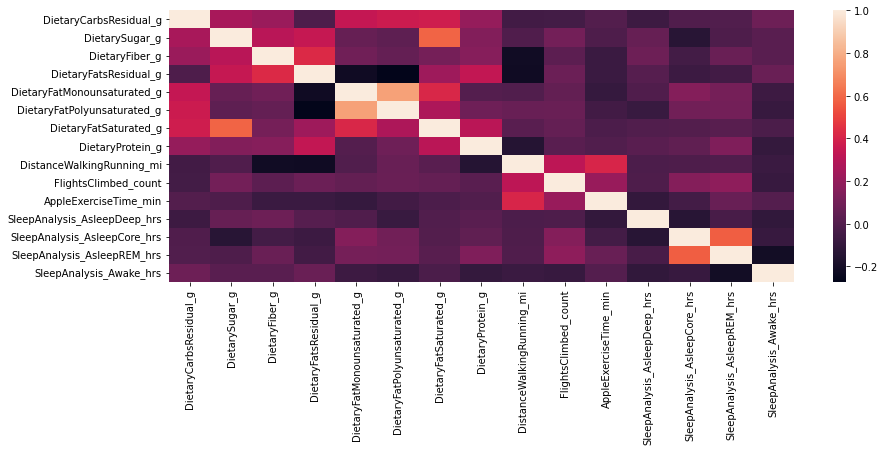

In [315]:
import seaborn as sns
sns.heatmap(feature_3.corr())

In [316]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(feature_3, df['weight_loss'], random_state = 42, test_size = .25)

### KNN

In [317]:
results = find_best_knn('knn', X_train, X_test, y_train, y_test)
level_3_df = results

### Log Reg

In [318]:
# Build a pipeline with StandardScaler and Logistic Regression
lr_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('LR', LogisticRegression(random_state=42))])

# Define the grid
grid = [{'LR__C': [1, 1E6, 1E12], 
         'LR__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}] 

# Define a grid search
gridsearch = GridSearchCV(estimator=lr_pipeline, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('LR',
                                        LogisticRegression(random_state=42))]),
             param_grid=[{'LR__C': [1, 1000000.0, 1000000000000.0],
                          'LR__solver': ['liblinear', 'newton-cg', 'lbfgs',
                                         'sag', 'saga']}],
             scoring='accuracy')

In [319]:
results = scoring ((f'logreg'), gridsearch, X_train, X_test, y_train, y_test)
level_3_df = level_3_df._append(results, ignore_index = True)

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Decision Tree

In [320]:
# Build a pipeline with StandardScaler and DecisionTree
dt_pipeline = Pipeline([('DT', DecisionTreeClassifier())])

# Define the grid
grid = [{'DT__criterion': ['gini', 'entropy'],
         'DT__max_depth': [2, 3, 4, 5, 6],
         'DT__min_samples_split': [5, 10, 15]}] 

# Define a grid search
gridsearch = GridSearchCV(estimator=dt_pipeline, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit the training data
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('DT', DecisionTreeClassifier())]),
             param_grid=[{'DT__criterion': ['gini', 'entropy'],
                          'DT__max_depth': [2, 3, 4, 5, 6],
                          'DT__min_samples_split': [5, 10, 15]}],
             scoring='accuracy')

In [321]:
results = scoring ((f'dec_tree'), gridsearch, X_train, X_test, y_train, y_test)
level_3_df = level_3_df._append(results, ignore_index = True)

### SVM

In [322]:
# Build a pipeline with StandardScaler and Logistic Regression
SVM_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('SVM', svm.SVC(kernel='linear'))]) 

# Define parameters
parameters = {
    'SVM__coef0': [0.01, 1, 10],
    'SVM__gamma': [0.001, 0.01, 0.1]}

# Define a grid search
gridsearch = GridSearchCV(estimator=SVM_pipeline,
                          param_grid=parameters,
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

results = scoring ((f'SVM'), gridsearch, X_train, X_test, y_train, y_test)
level_3_df = level_3_df._append(results, ignore_index = True)

### GNB

In [323]:
# Build a pipeline with StandardScaler and Logistic Regression
GNB_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('GNB', GaussianNB())]) 

# Define parameters
parameters = {
    'GNB__priors': [None],
    'GNB__var_smoothing': [0.00000001, 0.000000001, 0.00000001]}

# Define a grid search
gridsearch = GridSearchCV(estimator=GNB_pipeline,
                          param_grid=parameters,
                          scoring='accuracy', 
                          cv=10)

# Fit the training data
gridsearch.fit(X_train, y_train)

results = scoring ((f'GNB'), gridsearch, X_train, X_test, y_train, y_test)
level_3_df = level_3_df._append(results, ignore_index = True)

In [324]:
level_3_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,"knn, k = 7",0.750000,0.400000,0.551020,0.521739,0.685747
1,logreg,0.789474,0.500000,0.612245,0.612245,0.692644
2,dec_tree,0.800000,0.533333,0.632653,0.640000,0.589885
3,SVM,0.714286,0.500000,0.571429,0.588235,0.664828
4,GNB,0.736842,0.466667,0.571429,0.571429,0.630345


### Neural Network

In [325]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.fit_transform(X_test)

In [326]:
model_1 = Sequential()

#we'll start with 10 neurons, and an input shape of 14
model_1.add(Dense(8, activation='tanh', input_shape=(15,)))
model_1.add(Dense(4, activation='tanh'))
model_1.add(Dense(2, activation='tanh'))

#output classification layer
model_1.add(Dense(1, activation='sigmoid'))

In [327]:
from keras import optimizers
# Compile the model
model_1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=[tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)])

In [328]:
#fit model
results_1  = model_1.fit(scaled_data_train,
                    y_train,
                    epochs=50,
                    validation_split=0.25)

Epoch 1/50
4/4 [==============================] - 1s 76ms/step - loss: 0.7631 - binary_accuracy: 0.4128 - val_loss: 0.7209 - val_binary_accuracy: 0.5405
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 0.7597 - binary_accuracy: 0.4220 - val_loss: 0.7193 - val_binary_accuracy: 0.5405
Epoch 3/50
4/4 [==============================] - 0s 18ms/step - loss: 0.7560 - binary_accuracy: 0.4128 - val_loss: 0.7179 - val_binary_accuracy: 0.5405
Epoch 4/50
4/4 [==============================] - 0s 16ms/step - loss: 0.7528 - binary_accuracy: 0.4220 - val_loss: 0.7168 - val_binary_accuracy: 0.5405
Epoch 5/50
4/4 [==============================] - 0s 22ms/step - loss: 0.7499 - binary_accuracy: 0.4220 - val_loss: 0.7156 - val_binary_accuracy: 0.5405
Epoch 6/50
4/4 [==============================] - 0s 18ms/step - loss: 0.7470 - binary_accuracy: 0.4404 - val_loss: 0.7145 - val_binary_accuracy: 0.5405
Epoch 7/50
4/4 [==============================] - 0s 19ms/step - loss: 0.7441 - bi

In [330]:
results = nn_scoring ('nn', model_1, scaled_data_test, y_test)
level_3_df = level_3_df._append(results, ignore_index = True)

2/2 [==============================] - 0s 4ms/step


In [331]:
level_3_df

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc
0,"knn, k = 7",0.750000,0.400000,0.551020,0.521739,0.685747
1,logreg,0.789474,0.500000,0.612245,0.612245,0.692644
2,dec_tree,0.800000,0.533333,0.632653,0.640000,0.589885
3,SVM,0.714286,0.500000,0.571429,0.588235,0.664828
4,GNB,0.736842,0.466667,0.571429,0.571429,0.630345
5,nn,0.535714,0.500000,0.428571,0.517241,n/a
6,nn,0.535714,0.500000,0.428571,0.517241,n/a


### Evaluation
We have performed a preliminary review of our feature segmentation with various models. To select the best model to use, we'll consider two factors.

![precision_and_recall](images/precision_and_recall.png)

1. Precision reflects our True Positives. Which is what we care about, right? We want to predict for our end-users the best chance of losing weight. We care less about considering ALL of the ways they can lose weight, and want to focus on SURE FIRE ways to lose weight - True Positives. Are we will to sacrifice some instances where weight loss occured? Sure For instance, do we care about False Negatives? So precision is a good metric for this.

2. As a secondary consideration, accuracy is important. It measures both True Positives and True Negatives. It's helpful to provide certainty for both how to LOSE weight and how to GAIN weight. However, this is really secondary to the goal.

In [351]:
level_1_df['features'] = '1'
level_2_df['features'] = '2'
level_3_df['features'] = '3'

total_df = pd.concat([level_1_df, level_2_df, level_3_df], axis = 0)

In [356]:
precision = total_df.sort_values('Precision', ascending = False).head(5)
precision

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc,features
2,dec_tree,0.800000,0.533333,0.632653,0.640000,0.589885,3
2,dec_tree,0.789474,0.500000,0.612245,0.612245,0.732644,2
1,logreg,0.789474,0.500000,0.612245,0.612245,0.692644,3
5,nn,0.750000,0.600000,0.632653,0.666667,n/a,2
0,"knn, k = 7",0.750000,0.400000,0.551020,0.521739,0.685747,3


Interesting. Both of our decision Tree odels provided the best Precision, while sacrificing Recall, or False Negatives. Let's look at accuracy.

In [357]:
accuracy = total_df.sort_values('Accuracy', ascending = False).head(5)

In [358]:
accuracy

,Model,Precision,Recall,Accuracy,F1,Cross-Val-Acc,features
5,nn,0.750000,0.600000,0.632653,0.666667,n/a,2
2,dec_tree,0.800000,0.533333,0.632653,0.640000,0.589885,3
2,logreg,0.703704,0.633333,0.612245,0.666667,0.685057,1
4,GNB,0.703704,0.633333,0.612245,0.666667,0.712414,1
2,dec_tree,0.789474,0.500000,0.612245,0.612245,0.732644,2


Both of our decision tree models are in the top 5. With our decision tree model for feature 3 having the best accuracy with our Neural Network at 63%. This is an improvement of nearly 20% of our random model. Let's dig in to our Decision Tree.

### Decision Tree Fine Tuning
Now let's perform some fine tuning on our Decision Tree. Let's bring back our best performing tree and take a deeper look. This was the decision tree at Feature 3.

In [395]:
# Split the data
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(feature_3, df['weight_loss'], random_state = 42, test_size = .25)

In [397]:
# Build a pipeline with StandardScaler and DecisionTree
dt_pipeline_3 = Pipeline([('DT_3', DecisionTreeClassifier())])

# Define the grid
grid = [{'DT_3__criterion': ['gini', 'entropy'],
         'DT_3__max_depth': [2, 3, 4, 5, 6],
         'DT_3__min_samples_split': [5, 10, 15]}] 

# Define a grid search
gridsearch_3 = GridSearchCV(estimator=dt_pipeline_3, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit the training data
gridsearch_3.fit(X_train_3, y_train_3)
print("Best Parameters: \n{}\n".format(gridsearch_3.best_params_))

Best Parameters: 
{'DT_3__criterion': 'entropy', 'DT_3__max_depth': 4, 'DT_3__min_samples_split': 15}



In [398]:
DT_3 = DecisionTreeClassifier(criterion='entropy', max_depth = 4, min_samples_split = 15)
DT_3.fit(X_train_3, y_train_3)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

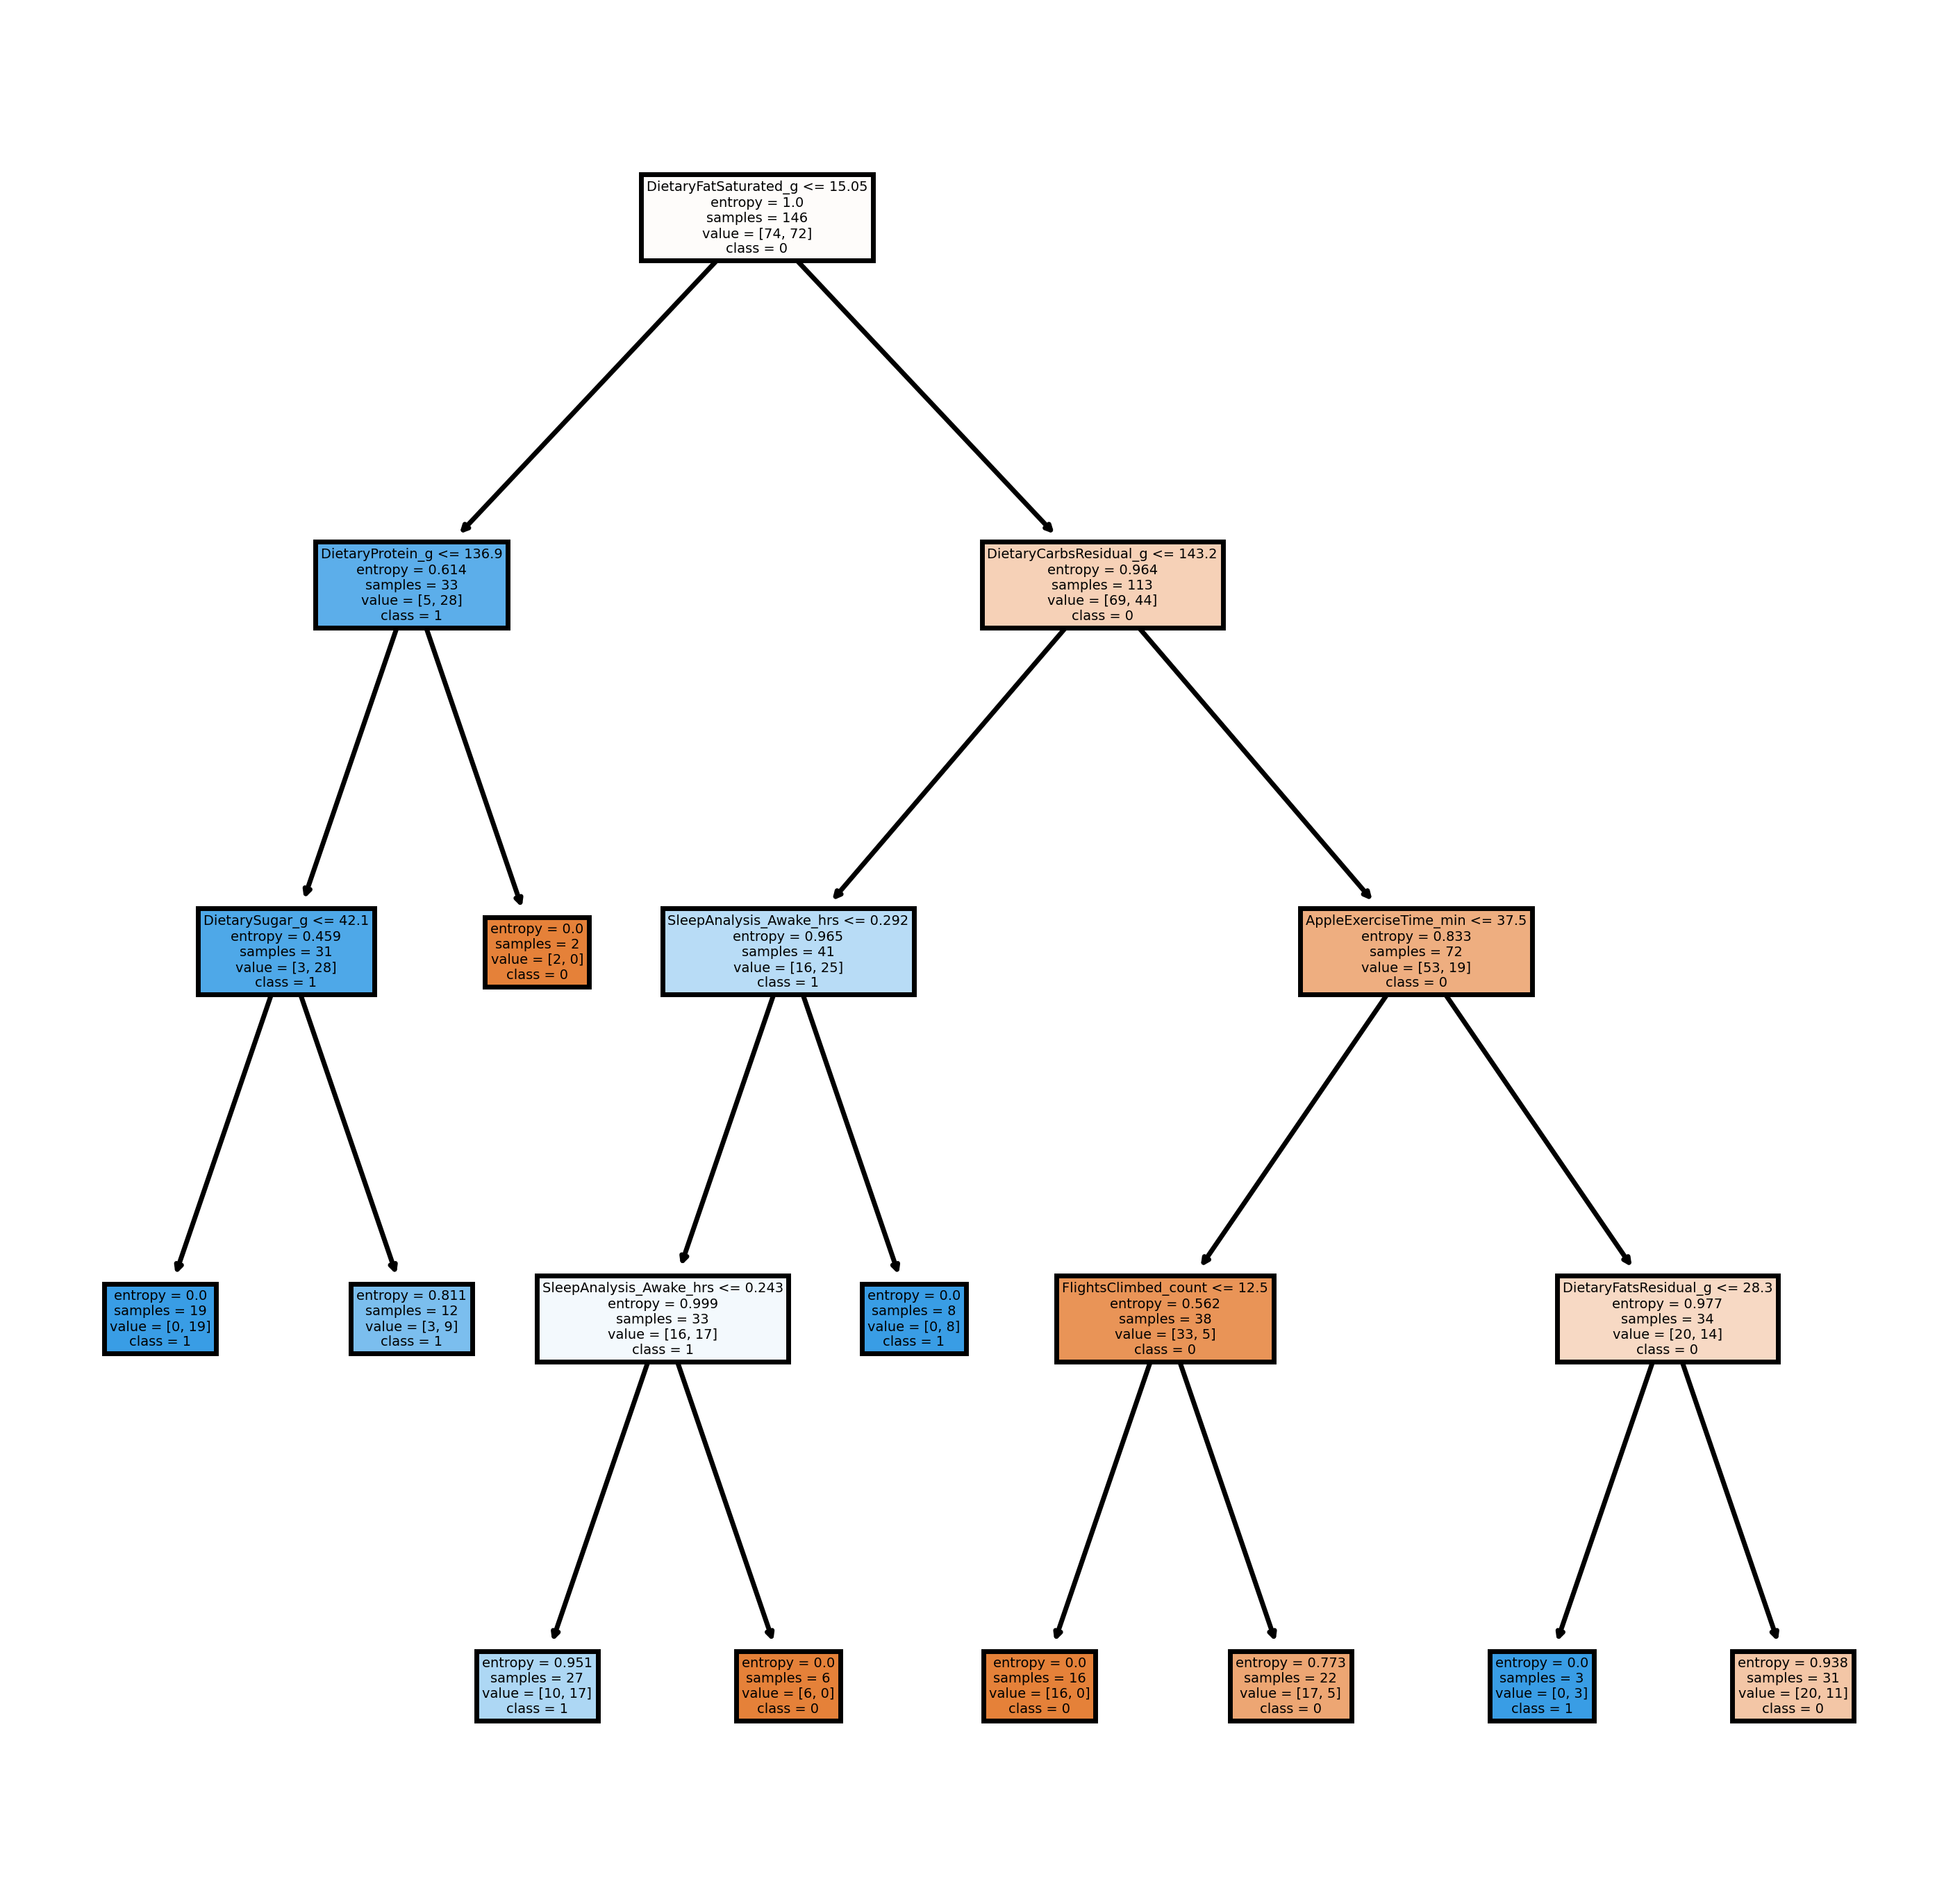

In [399]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (7,7), dpi=500)
tree.plot_tree(DT_3,
               feature_names = X_train_3.columns, 
               class_names=np.unique(y_train_3).astype('str'),
               filled = True)
plt.show()

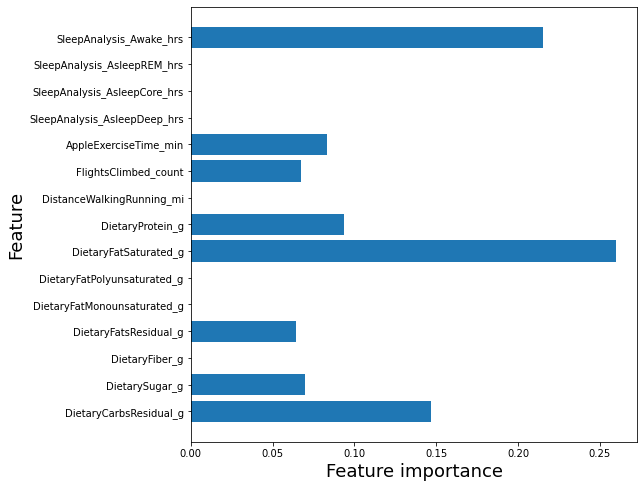

In [400]:
def plot_feature_importances(model):
    n_features = X_train_3.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_3.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(DT_3)

In [401]:
# Split the data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(feature_2, df['weight_loss'], random_state = 42, test_size = .25)

In [402]:
# Build a pipeline with StandardScaler and DecisionTree
dt_pipeline_2 = Pipeline([('DT_2', DecisionTreeClassifier())])

# Define the grid
grid = [{'DT_2__criterion': ['gini', 'entropy'],
         'DT_2__max_depth': [2, 3, 4, 5, 6],
         'DT_2__min_samples_split': [5, 10, 15]}] 

# Define a grid search
gridsearch_2 = GridSearchCV(estimator=dt_pipeline_2, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit the training data
gridsearch_2.fit(X_train_2, y_train_2)
print("Best Parameters: \n{}\n".format(gridsearch_2.best_params_))

Best Parameters: 
{'DT_2__criterion': 'gini', 'DT_2__max_depth': 2, 'DT_2__min_samples_split': 5}



In [403]:
DT_2 = DecisionTreeClassifier(criterion='entropy', max_depth = 2, min_samples_split = 5)
DT_2.fit(X_train_2, y_train_2)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=5)

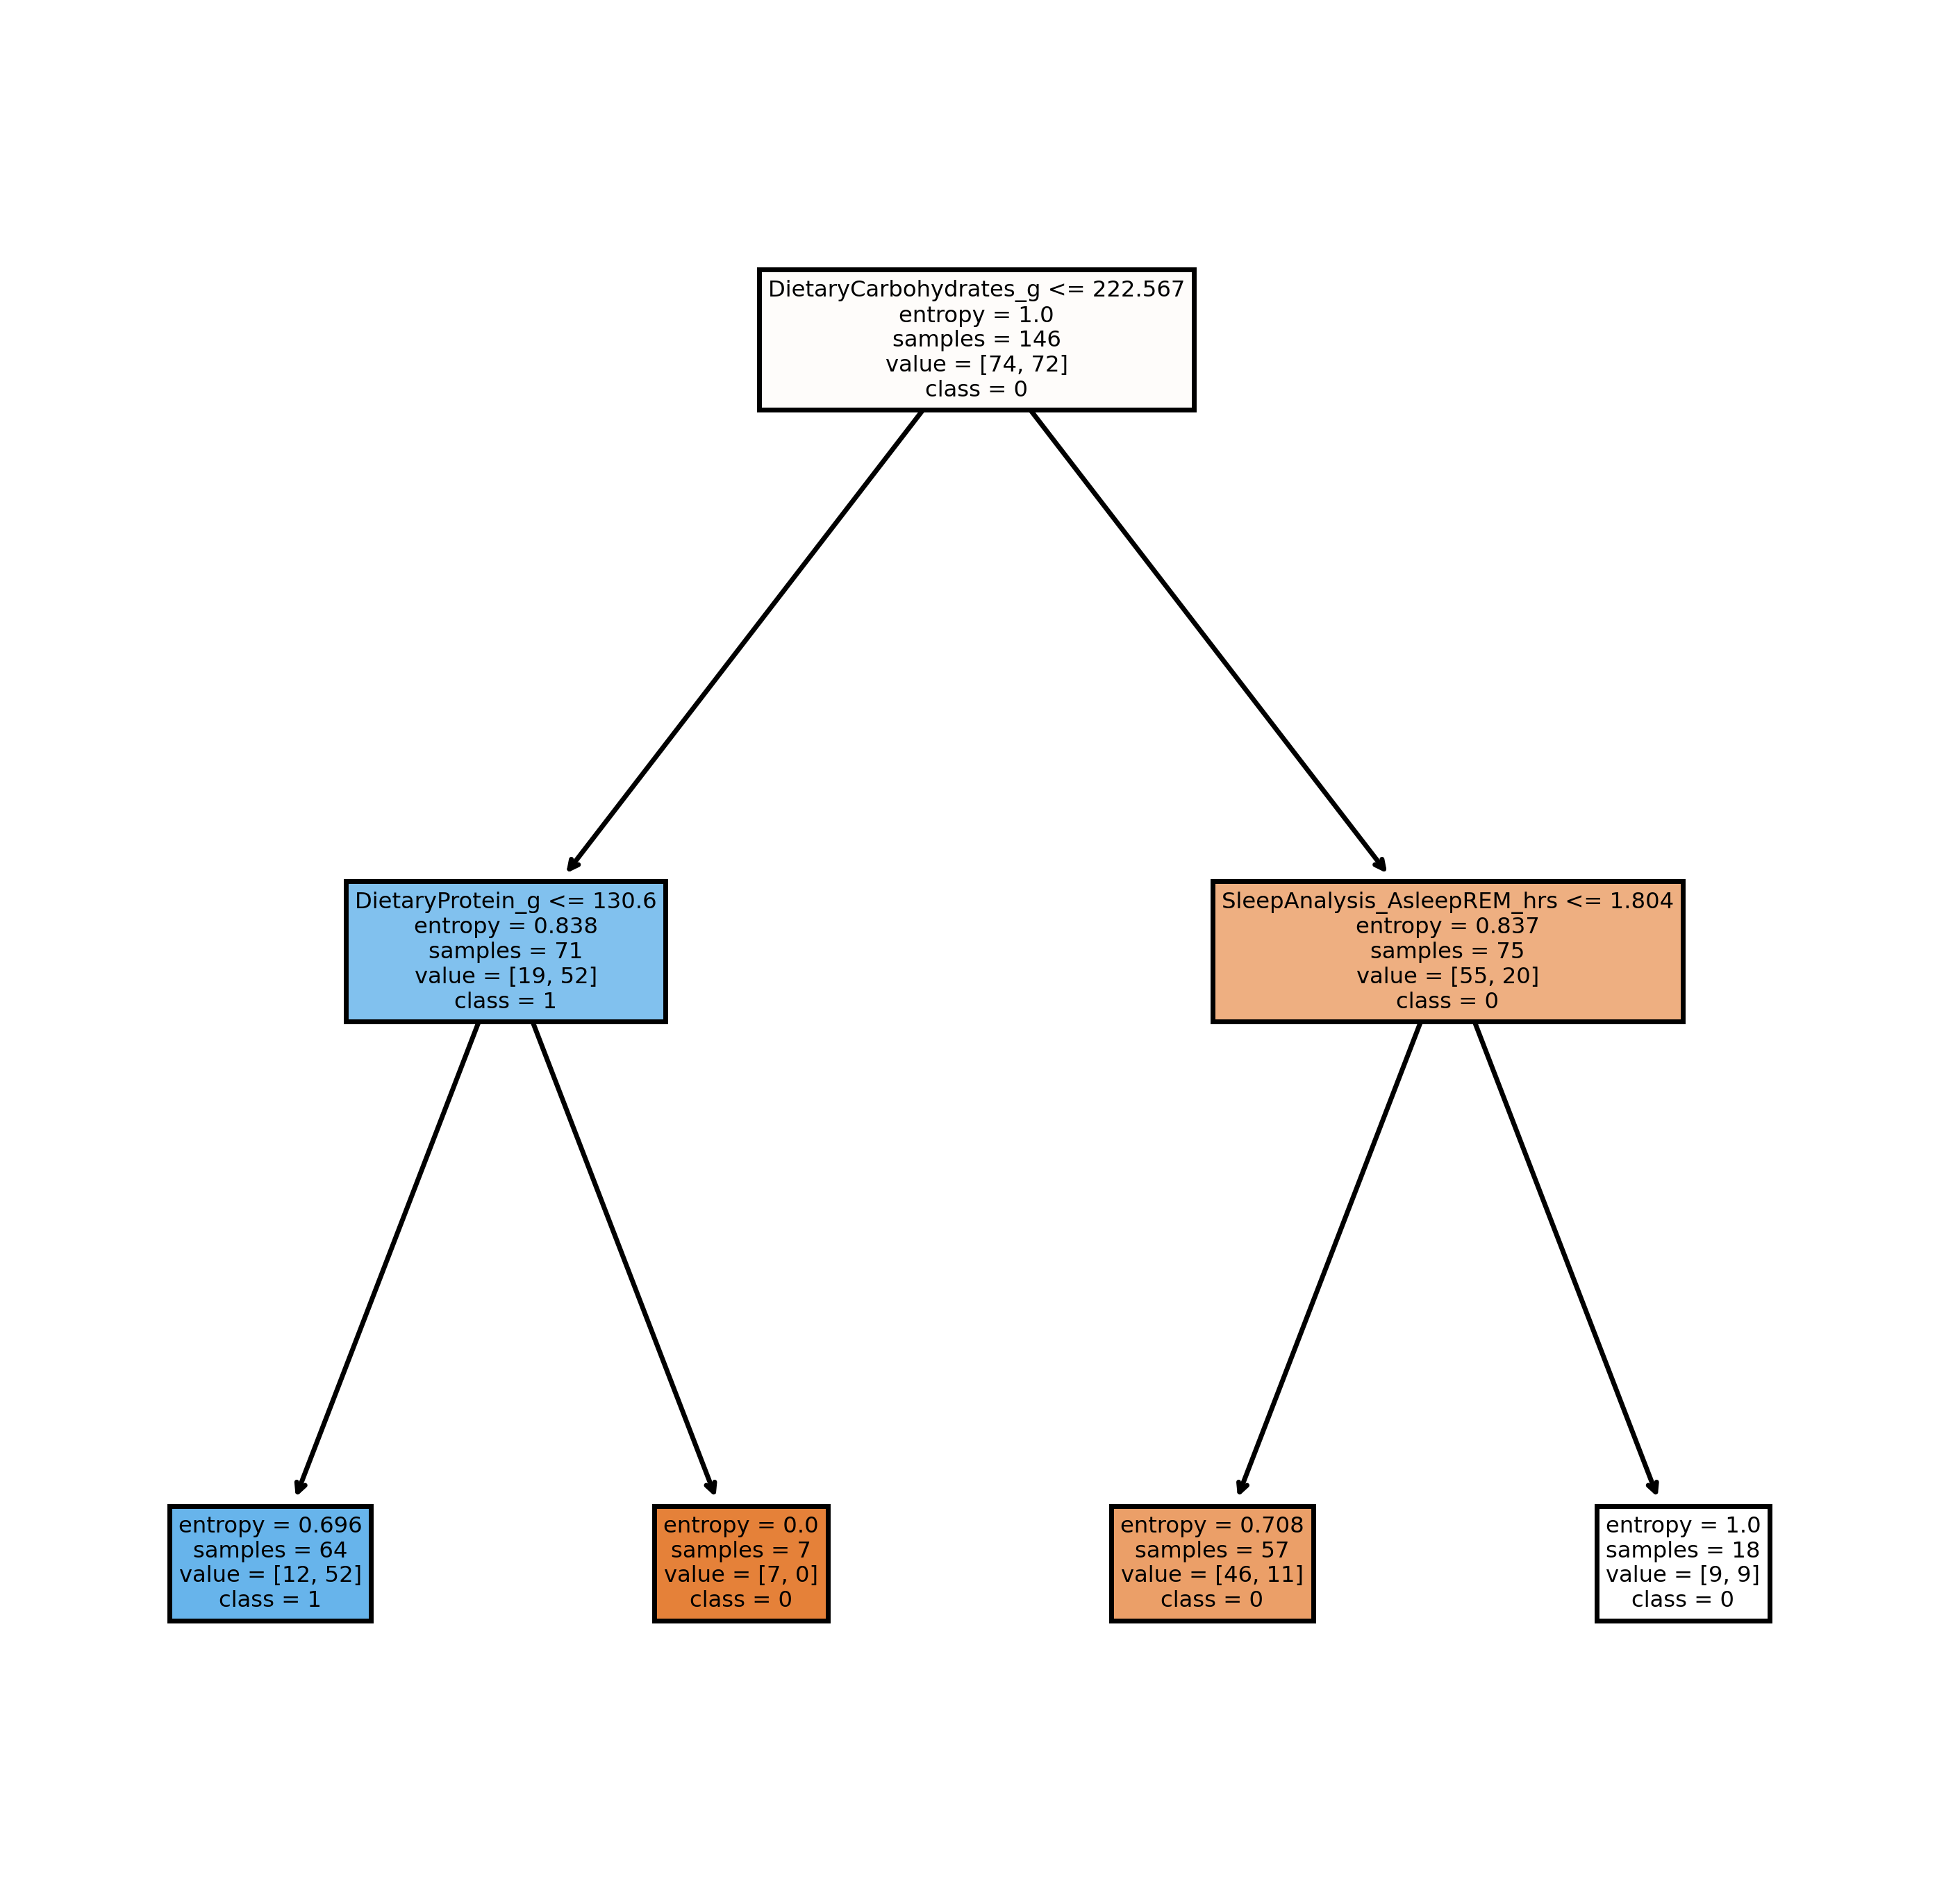

In [404]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (7,7), dpi=500)
tree.plot_tree(DT_2,
               feature_names = X_train_2.columns, 
               class_names=np.unique(y_train_2).astype('str'),
               filled = True)
plt.show()

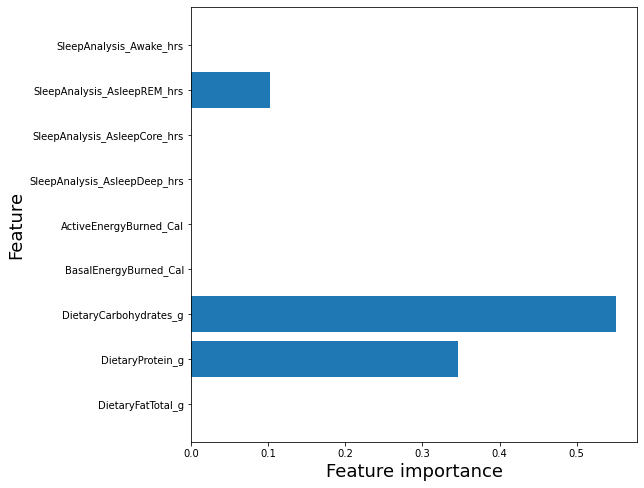

In [405]:
def plot_feature_importances(model):
    n_features = X_train_2.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_2.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(DT_2)

THis is fascinating. In this particular model, when less Dietary Carbohydrates than 222.5 g were consumed, 73% of the days there was wieght loss the next day. When above, 73% of the next days experienced weight gains. That's regardless of any other considerations! That one factor alone is staggering.

Now let's see what happens when we combined this data. I'm curious what we'll find.

In [438]:
feature_2_3 = pd.concat([feature_2, df[level_3_diet_carbs], df[level_3_diet_fat]], axis=1)
feature_2_3

,DietaryFatTotal_g,DietaryProtein_g,DietaryCarbohydrates_g,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs,DietaryCarbsResidual_g,DietarySugar_g,DietaryFiber_g,DietaryFatsResidual_g,DietaryFatMonounsaturated_g,DietaryFatPolyunsaturated_g,DietaryFatSaturated_g
date,,,,,,,,,,,,,,,,
2023-08-24,159.7455,166.7683,405.4413,2055.322,564.7780,0.783333,5.558333,1.766667,0.266667,263.0599,91.6303,50.7511,102.2252,9.5,11.8,36.2203
2023-08-25,62.9275,106.1325,152.7750,2174.950,793.3800,1.008333,3.700000,1.500000,0.133333,87.4023,46.1907,19.1820,52.1110,0.0,0.0,10.8165
2023-08-26,118.3000,113.6000,219.5000,2074.476,395.3870,1.400000,3.916667,1.558333,0.050000,111.3000,93.4000,14.8000,55.5000,15.0,8.3,39.5000
2023-08-27,79.9300,125.8100,170.3400,2187.383,895.4360,0.891667,5.566667,2.591667,0.066667,87.5300,39.7900,43.0200,45.9700,2.9,3.1,27.9600
2023-08-28,70.8500,121.2500,210.4000,2186.244,901.5490,0.641667,5.275000,2.008333,0.158333,119.4100,64.5900,26.4000,42.8500,7.1,4.6,16.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,94.9000,71.3000,319.0000,2004.932,542.6680,0.700000,4.475000,1.683333,2.525000,185.8000,98.7000,34.5000,56.4000,10.7,5.6,22.2000
2024-03-02,76.2000,79.3000,225.7000,2048.925,1651.9890,0.863462,4.172222,1.510000,0.252308,128.0000,74.1000,23.6000,45.8000,3.0,2.4,25.0000
2024-03-03,59.9000,108.7000,239.3000,2048.189,1443.2150,1.108333,3.925000,1.966667,0.300000,174.8000,47.0000,17.5000,48.3000,0.6,1.3,9.7000


In [441]:
# Split the data
X_train_2_3, X_test_2_3, y_train_2_3, y_test_2_3 = train_test_split(feature_2_3, df['weight_loss'], random_state = 42, test_size = .25)

In [442]:
# Build a pipeline with StandardScaler and DecisionTree
dt_pipeline_2_3 = Pipeline([('DT_2_3', DecisionTreeClassifier())])

# Define the grid
grid = [{'DT_2_3__criterion': ['gini', 'entropy'],
         'DT_2_3__max_depth': [2, 3, 4, 5, 6],
         'DT_2_3__min_samples_split': [5, 10, 15]}] 

# Define a grid search
gridsearch_2_3 = GridSearchCV(estimator=dt_pipeline_2_3, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit the training data
gridsearch_2_3.fit(X_train_2_3, y_train_2_3)
print("Best Parameters: \n{}\n".format(gridsearch_2_3.best_params_))

Best Parameters: 
{'DT_2_3__criterion': 'gini', 'DT_2_3__max_depth': 2, 'DT_2_3__min_samples_split': 5}



In [454]:
DT_2_3 = DecisionTreeClassifier(criterion='gini', max_depth = 3, min_samples_split = 5, min_samples_leaf=10)
DT_2_3.fit(X_train_2_3, y_train_2_3)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=5)

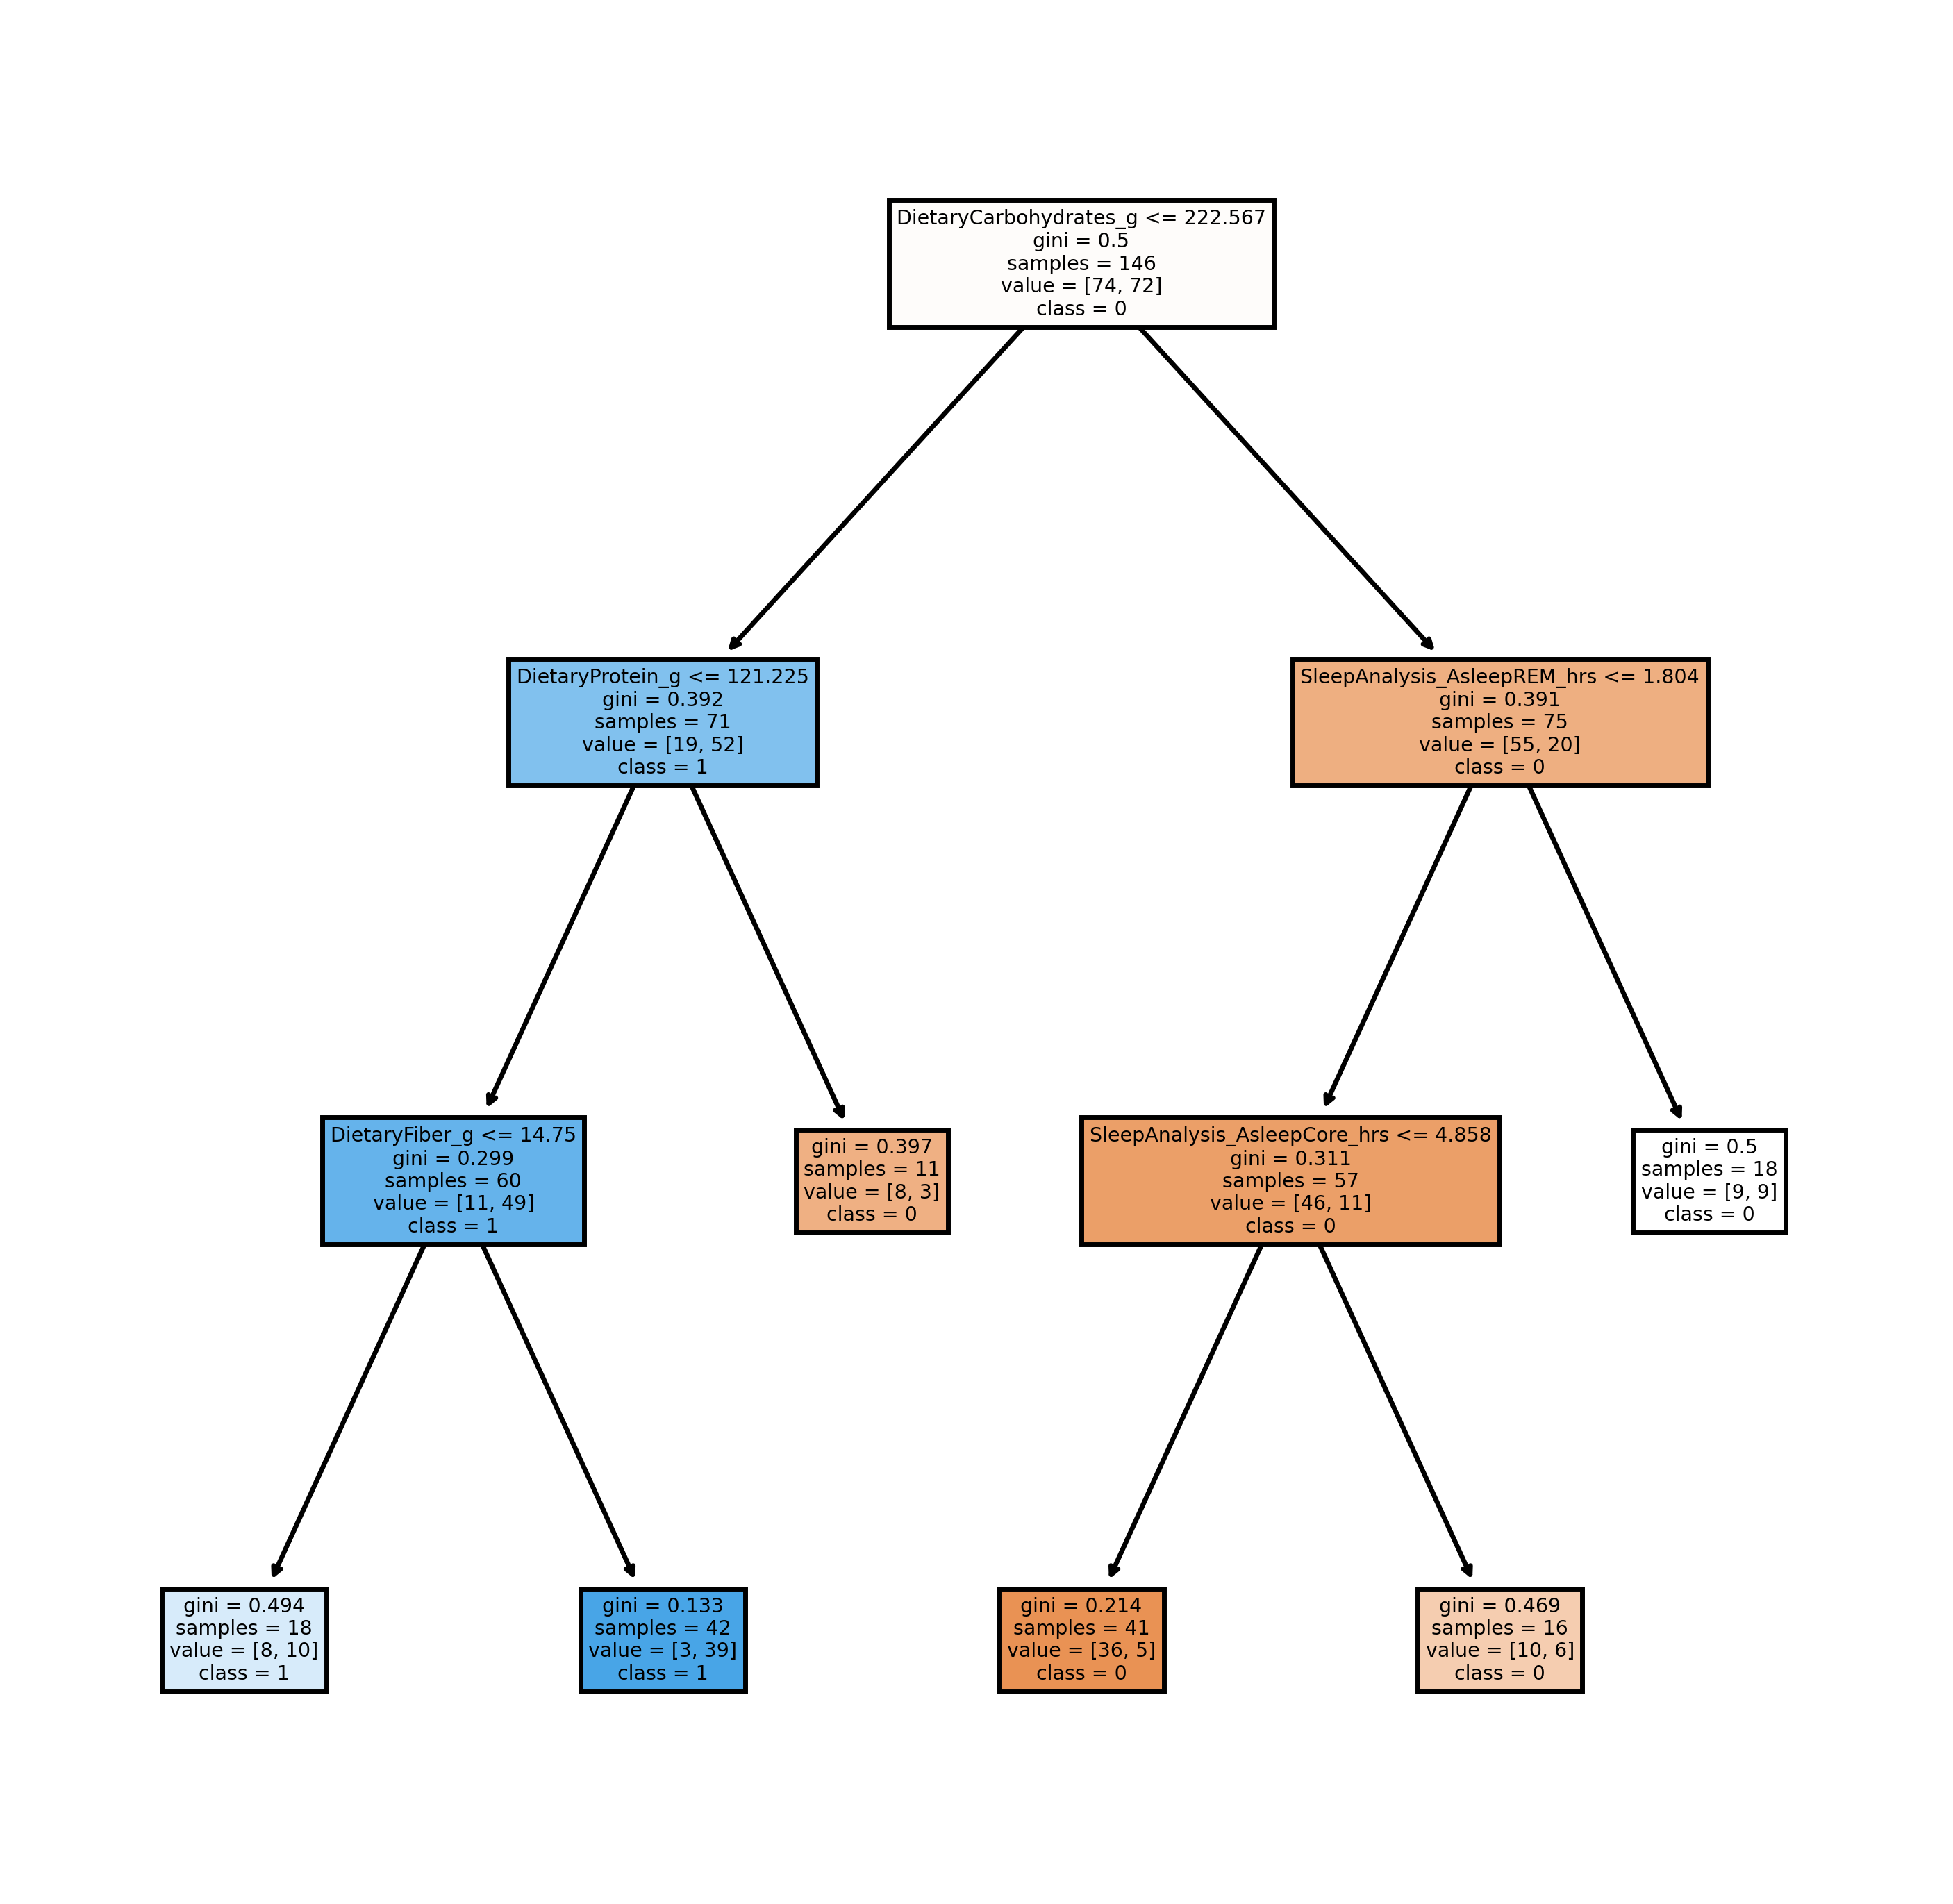

In [455]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (7,7), dpi=500)
tree.plot_tree(DT_2_3,
               feature_names = X_train_2_3.columns, 
               class_names=np.unique(y_train_2_3).astype('str'),
               filled = True)
plt.show()

This is fascinating. It turns out that the hours of sleep we get impact us if we've eaten more than 221 grams of Carbs. We see the values as Core Hours and REM hours. These are the hours we sleep the most.

On the weight loss side. It appears that the fiber we have contributes to weight loss. In fact, days where total carbs and protein are under a certain amount. Let's see if we can combine sleep, and perhaps mitigate the effects of Protein.

There appear to be only 11 instances where Carbohydrates are greater than 222.5 grams and Protein is greater than 121 grams. In fact, let's see where are two numbers fall.

In [456]:
from scipy.stats import percentileofscore

percentile_of_protein = percentileofscore(df['DietaryProtein_g'], 121)
print(percentile_of_protein)

83.58974358974359


In [457]:
percentile_of_protein = percentileofscore(df['DietaryCarbohydrates_g'], 222.5)
print(percentile_of_protein)

47.17948717948718


As we can see, 222.5 grams of Carbohydrates is the 47% percentile. Basically the median. This thresholds splits our data nearly evenly, with fairly strong results after that.

The protein threshold is really high, and after our carbs split, only accounts for 11 samples, 8 of which are weight gains.

Let's see what the data looks like without the Protein and with sleep combined.

In [492]:
feature_sleep = pd.concat([df[level_2_diet + level_2_exer], df[level_3_diet_carbs + level_3_diet_fat + level_1_sleep]], axis=1)

In [478]:
#feature_sleep.drop('DietaryProtein_g', axis = 1, inplace = True)

In [493]:
# Split the data
X_train_sleep, X_test_sleep, y_train_sleep, y_test_sleep = train_test_split(feature_sleep, df['weight_loss'], random_state = 42, test_size = .25)

In [494]:
DT_sleep = DecisionTreeClassifier(criterion='gini', max_depth = 3, min_samples_split = 5, min_samples_leaf=10)
DT_sleep.fit(X_train_sleep, y_train_sleep)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=5)

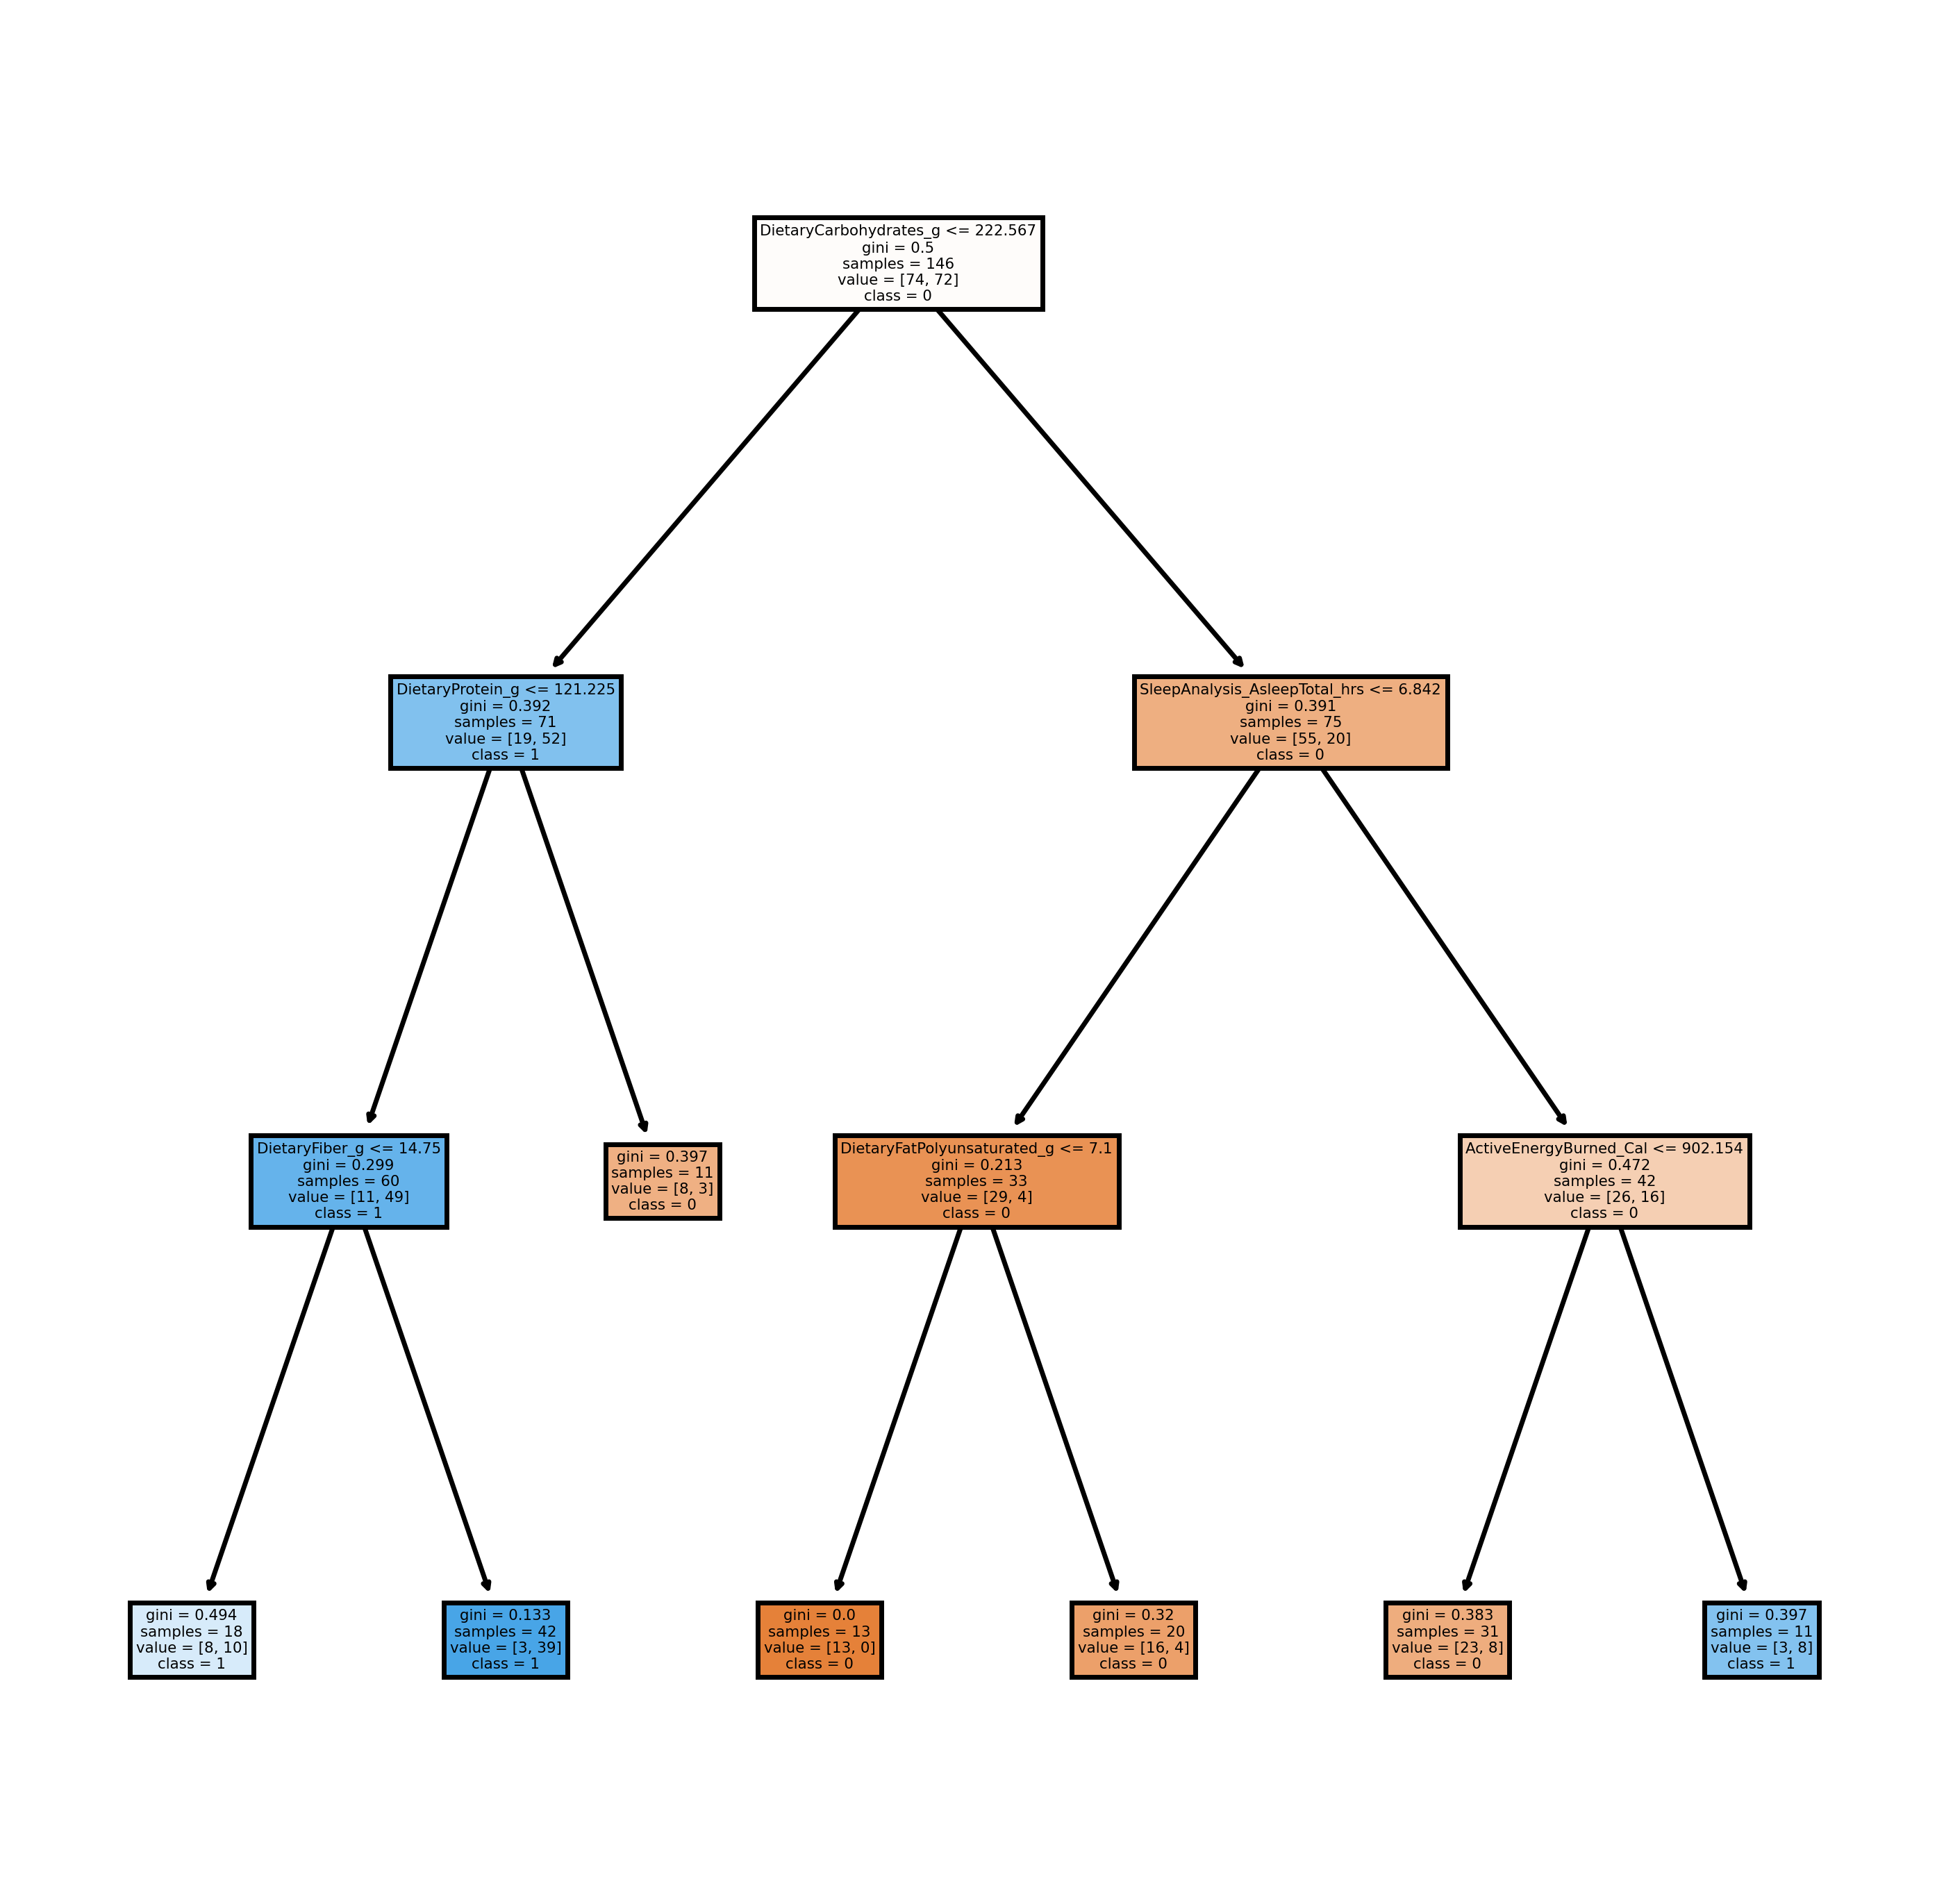

In [495]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (7,7), dpi=500)
tree.plot_tree(DT_sleep,
               feature_names = X_train_sleep.columns, 
               class_names=np.unique(y_train_sleep).astype('str'),
               filled = True)
plt.show()

Wow, just as we suspected, total sleep hours played a significant role.

In [499]:
percentile_of_sleep = percentileofscore(df['SleepAnalysis_AsleepTotal_hrs'], 6.9)
print(percentile_of_sleep)

38.46153846153846


38% percentile. Interesting.

In [501]:
percentile_of_fiber = percentileofscore(df['DietaryFiber_g'], 14.8)
print(percentile_of_fiber)

16.666666666666668


In [517]:
carb_under_loss = df[(df['DietaryCarbohydrates_g'] < 222.567) & (df['weight_loss'] == 1)]['weight_loss'].count()
carb_under_gain = df[(df['DietaryCarbohydrates_g'] < 222.567) & (df['weight_loss'] == 0)]['weight_loss'].count()
carb_over_loss = df[(df['DietaryCarbohydrates_g'] > 222.567) & (df['weight_loss'] == 1)]['weight_loss'].count()
carb_over_gain = df[(df['DietaryCarbohydrates_g'] > 222.567) & (df['weight_loss'] == 0)]['weight_loss'].count()

carb_over = [carb_over_loss, carb_over_gain]
carb_under = [carb_under_loss, carb_under_gain]

In [523]:
carb_under

[68, 24]

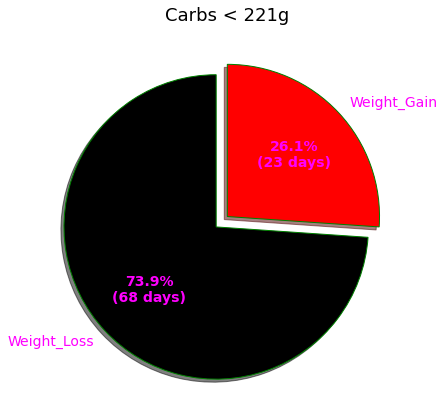

In [534]:
# Creating explode data
explode = (0.1, 0.0)
 
# Creating color parameters
colors = ("black", "red")
 
# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}
 
# Creating autocpt arguments
 
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} days)".format(pct, absolute)
 
 
# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(carb_under,
                                  autopct=lambda pct: func(pct, carb_under),
                                  explode=explode,
                                  labels=['Weight_Loss', 'Weight_Gain'],
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="magenta", size=14))
 
plt.setp(autotexts, size=14, weight="bold")
ax.set_title(f'Carbs < 221g')
 
# show plot
plt.show()

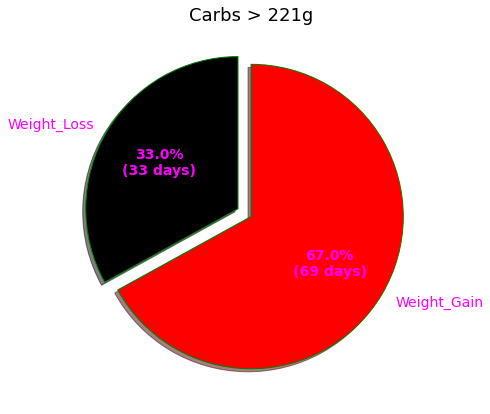

In [535]:
# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(carb_over,
                                  autopct=lambda pct: func(pct, carb_over),
                                  explode=explode,
                                  labels=['Weight_Loss', 'Weight_Gain'],
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="magenta", size=14))
 
plt.setp(autotexts, size=14, weight="bold")
ax.set_title(f'Carbs > 221g')
 
# show plot
plt.show()



In [548]:
carb_over_sleep_loss = df[(df['DietaryCarbohydrates_g'] > 222.567) & (df['SleepAnalysis_AsleepTotal_hrs'] < 6.84) & (df['weight_loss'] == 1)]['weight_loss'].count()
carb_over_sleep_gain = df[(df['DietaryCarbohydrates_g'] > 222.567) & (df['SleepAnalysis_AsleepTotal_hrs'] < 6.84) & (df['weight_loss'] == 0)]['weight_loss'].count()
carb_over_sleep = [carb_over_sleep_loss, carb_over_sleep_gain]

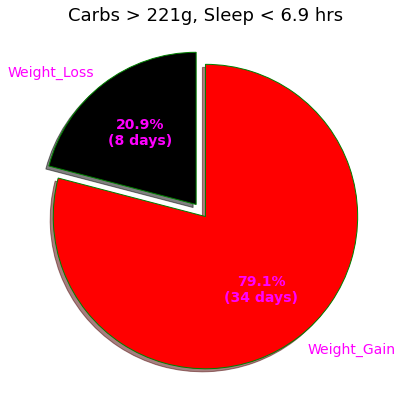

In [549]:
# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(carb_over_sleep,
                                  autopct=lambda pct: func(pct, carb_over_sleep),
                                  explode=explode,
                                  labels=['Weight_Loss', 'Weight_Gain'],
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="magenta", size=14))
 
plt.setp(autotexts, size=14, weight="bold")
ax.set_title(f'Carbs > 221g, Sleep < 6.9 hrs')
 
# show plot
plt.show()

In [554]:
carb_under_fiber_loss = df[(df['DietaryCarbohydrates_g'] < 222.567) & (df['DietaryFiber_g'] > 14.5) & (df['weight_loss'] == 1)]['weight_loss'].count()
carb_under_fiber_gain = df[(df['DietaryCarbohydrates_g'] < 222.567) & (df['DietaryFiber_g'] > 14.5) & (df['weight_loss'] == 0)]['weight_loss'].count()
carb_under_fiber = [carb_under_fiber_loss, carb_under_fiber_gain]
carb_under_fiber

[56, 14]

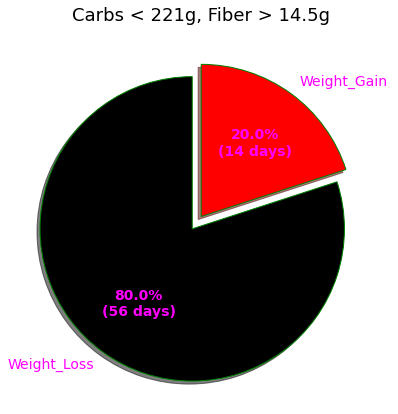

In [556]:
# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(carb_under_fiber,
                                  autopct=lambda pct: func(pct, carb_under_fiber),
                                  explode=explode,
                                  labels=['Weight_Loss', 'Weight_Gain'],
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="magenta", size=14))
 
plt.setp(autotexts, size=14, weight="bold")
ax.set_title(f'Carbs < 221g, Fiber > 14.5g')
 
# show plot
plt.show()

Note: you may need to restart the kernel to use updated packages.


Epoch 1/100
4/4 [==============================] - 1s 83ms/step - loss: 4.4673 - accuracy: 0.0367 - val_loss: 2.9299 - val_accuracy: 0.0811
Epoch 2/100
4/4 [==============================] - 0s 26ms/step - loss: 3.7154 - accuracy: 0.0367 - val_loss: 2.5068 - val_accuracy: 0.0811
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 3.2503 - accuracy: 0.0367 - val_loss: 2.1959 - val_accuracy: 0.0811
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 2.9012 - accuracy: 0.0367 - val_loss: 1.9877 - val_accuracy: 0.0811
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 2.6471 - accuracy: 0.0367 - val_loss: 1.8144 - val_accuracy: 0.0811
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 2.4299 - accuracy: 0.0459 - val_loss: 1.6741 - val_accuracy: 0.0811
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 2.2463 - accuracy: 0.0459 - val_loss: 1.5689 - val_accuracy: 0.0811
Epoch 8/100
4/4 [===

Correct?
False    0.523077
True     0.476923
Name: proportion, dtype: float64

BodyMass_lb           StepCount_count               \
                   mean       std            mean          std   
weight_loss                                                      
0            183.873214  6.040966    13721.763441  6003.595778   
1            186.413158  6.170410    14044.833333  5109.694465   

            DistanceWalkingRunning_mi           BasalEnergyBurned_Cal  \
                                 mean       std                  mean   
weight_loss                                                             
0                            7.148320  3.499317           2085.135079   
1                            7.350952  3.125898           2101.654011   

                       ActiveEnergyBurned_Cal              ...  \
                   std                   mean         std  ...   
weight_loss                                                ...   
0            69.287741             751.561394  259.514675  ...   
1            59.503110             803.008833  245.528494  ...   

            BodyMass_lb_raw           SleepAnalysis_AsleepTotal_hrs            \
                       mean       std                          mean       std   
weight_loss                                                                     
0                183.873214  6.040966                      7.324480  1.221857   
1                186.413158  6.170410                      7.439939  1.160025   

            TotalEnergyBurned_Cal             DietaryCarbsResidual_g  \
                             mean         std                   mean   
weight_loss                                                            
0                     2836.696473  290.765121             161.517981   
1                     2904.662844  280.360873             137.324513   

                       DietaryFatsResidual_g             
                   std                  mean        std  
weight_loss                                              
0            46.635794             40.970560  15.178598  
1            47.510769             41.218841  17.298612  

[2 rows x 104 columns]

Precision Score: 0.8095238095238095
Recall Score: 0.5666666666666667
Accuracy Score: 0.6530612244897959
F1 Score: 0.6666666666666666


0.6263157894736842

,DietaryFatTotal_g,DietaryProtein_g,DietaryCarbohydrates_g,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs
date,,,,,,,,,
2023-10-28,85.373071,99.128901,222.833223,2082.017,593.098,1.408333,5.333333,2.466667,0.033333
2023-12-06,75.000000,135.800000,247.800000,2045.556,927.237,0.925000,5.100000,2.558333,0.141667
2024-01-30,90.700000,83.100000,300.800000,1955.176,512.073,0.716667,4.308333,1.433333,2.133333
2023-11-10,85.373071,99.128901,222.833223,2179.208,768.220,1.016667,3.191667,0.825000,0.041667
2023-11-08,77.600000,34.500000,134.300000,2099.170,969.243,1.258333,5.608333,2.125000,0.252308
...,...,...,...,...,...,...,...,...,...
2023-12-08,115.900000,103.200000,343.500000,1963.140,331.519,1.083333,6.008333,2.458333,0.108333
2023-09-07,58.800000,92.800000,214.800000,2156.269,744.999,0.863462,4.172222,1.510000,0.252308
2023-11-24,29.500000,42.700000,141.900000,2106.732,866.437,1.258333,5.791667,1.491667,0.175000


Precision Score: 0.68
Recall Score: 0.5666666666666667
Accuracy Score: 0.5714285714285714
F1 Score: 0.6181818181818183


0.6007894736842105

Best Value for k: 5
F1-Score: 0.6382978723404256


0.5644736842105263

### SUMMARY
We downloaded the data, analyzed it, and decided to run some more analysis.